**MUDANÇA A FAZER: Adaptar código para modelo do wolf > Definir como declarar jacobiana**


In [1]:
import numpy as np
import math
from numpy.linalg import inv

#Visualização de Dados
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from tabulate import tabulate

In [18]:
def reshape_novo(vetor, a,b):
    
    linhas, colunas = vetor.shape
    total = linhas * colunas
    
    vetor_transform = np.zeros((1,total))
    vetor_dim_1 = vetor.reshape(1,total)
    
    for i in range(0,colunas):
        vetor_transform[0,(i*linhas):(i+1)*linhas] = vetor_dim_1[0,i:total:colunas] 
        
    vetor_transform = vetor_transform.reshape(a,b)
    
    return vetor_transform
        
    

In [42]:
##### Inicio Teste Reshape Novo ######

In [43]:
n = 3
dx = np.zeros((n,n+1))
dx

for k in range(0,n):
    for i in range (0,n+1):
        dx[k,i] = (k+1)*(i+1)
        
dx

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  4.,  6.,  8.],
       [ 3.,  6.,  9., 12.]])

In [44]:
dx_res = dx.reshape(4,3)
dx_res

array([[ 1.,  2.,  3.],
       [ 4.,  2.,  4.],
       [ 6.,  8.,  3.],
       [ 6.,  9., 12.]])

In [45]:
dx_res[0,2:12:4]

array([3.])

In [46]:
dex_transf = reshape_novo(dx, 4, 3)
dex_transf

array([[ 1.,  2.,  3.],
       [ 2.,  4.,  6.],
       [ 3.,  6.,  9.],
       [ 4.,  8., 12.]])

In [47]:
dx_transf_dim1 = reshape_novo(dx,1,12)
dx_transf_dim1

array([[ 1.,  2.,  3.,  2.,  4.,  6.,  3.,  6.,  9.,  4.,  8., 12.]])

In [48]:
dex_transf[0,0:12:2]

array([1., 3.])

Até aqui código parece estar funcionando bem, mas parece haver problemas quando testamos para vetores em lugar de matrizes

In [10]:
X0

NameError: name 'X0' is not defined

In [ ]:
reshape_novo(X0,3,4)

**Solução:** Aplicar duas vezes, em (n+1,n) depois em (n,n+1)

In [ ]:
a1 = reshape_novo(X0,4,3)
reshape_novo(a1,3,4)

Ou colocar um reshape normal seguido de um novo:

In [ ]:
reshape_novo(X0.reshape(4,3),3,4)

In [ ]:
##### Fim Teste Reshape Novo ######

**Runge Kutta:**

In [19]:
def rka(model, s0, dt):
    
    '''Runge-Kutta de 4ª Ordem que apenas realiza um passo da iteração'''
    s = np.zeros(len(s0))
    
    k1 = dt * model(s0)
    k2 = dt * model(s0 + k1/2) 
    k3 = dt * model(s0 + k2/2)
    k4 = dt * model(s0 + k3)
           
    ds = (k1 + 2*k2 + 2*k3 +k4)/6
    
    #s[:,i+1] = s[:,i] + ds
    #s.append(s[:,i] + ds)
    #s.np.append(s[:,i] + ds, axis = 0)
    s = s0 + ds
    return s

**Gram-Schmidt**:

In [20]:
def gramschmidt(A):
    """
    Realiza a decomposição A=QR, aplicando o método de Gram-Schmidt à matriz A. 
    Retorna as matrizes Q e R
    """
    R = np.zeros((A.shape[1], A.shape[1]))
    Q = np.zeros(A.shape)
    for k in range(0, A.shape[1]):
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1, A.shape[1]):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
    return Q, R

**Modelos:**

In [21]:
def lr_model(s, k1 = 10, k2= 28, k3 = 8.0/3.0):
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    x = s[0]
    y = s[1]
    z = s[2]
    
    #Equações diferenciais do sistema
    dxdt = k1*(y - x)
    dydt = x*(k2-z)-y
    dzdt = x*y-k3*z

    #Queremos que retorne como um array para poder fazer as operações
    return np.array([dxdt,dydt,dzdt])

In [22]:
def pendulum_model(s, m1 = 2.0, m2 = 2.0, L01 = 1.0, L12 = 1.0):
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    O1 = s[0]
    O2 = s[1]
    w1 = s[2]
    w2 = s[3]
    
    #Outras Variavels do Sistema
    g = 9.8
    
    #Equações diferenciais do sistema
    
    dO1dt = w1
    dO2dt = w2
    aux1 =(g/L01)*(math.sin(O2) * math.cos(O1-O2) -(1 + m1/m2)*math.sin(O1))
    aux2 = (w2**2)*(L12/L01)*math.sin(O1-O2)
    aux3 = (w1**2)*math.sin(O1-O2)*math.cos(O1-O2)
    aux4 = (1+(m1/m2)-(math.cos(O1-O2))**2)
    #dw1dt = ((g/L01)*(math.sin(O2) * math.cos(O1-O2) -(1 + m1/m2)*math.sin(O1))-(w2**2)*(L12/L01)*math.sin(O1-O2)-(w1**2)*math.sin(O1-O2)*math.cos(O1-O2))/(1+(m1/m2)-(math.cos(O1-O2))**2) 
    dw1dt = (aux1 - aux2 - aux3)/aux4
    dw2dt = -dw1dt*(L01/L12)*math.cos(O1-O2)+(w1**2)*(L01/L12)*math.sin(O1-O2)-(g/L12)*math.sin(O2)
    
    
    return np.array([dO1dt,dO2dt,dw1dt,dw2dt])

**Modelos Generalizados:**

In [23]:
def model_gener_Wolf(s, n, model, Jac):
    
    nn = s.shape[1]
    
    #Corrigindo formatação de s: Queremos que as colunas representem cada um dos sistemas (trajetoria fiducial e perturbadas) 
    aux = s.reshape(n+1,n)
    X = reshape_novo(aux,n,n+1)
    ###### Opcao para 1 linha só >>>> X = reshape_novo(s.reshape(n+1,n),n,n+1)
    
    #X = np.zeros(n,n+1)
    dx = np.zeros((n,n+1))

    dx[:,0] = model (X[:,0])  
    
    for i in range(1,n+1):
        dx[:,i] = Jac @ X[:,i]
        
    #dx = dx.reshape(1,nn)
    dx = reshape_novo(dx,1,nn)
    
    #return np.array(dx)
    return dx

In [24]:
###Definir como usar

def jac_lor(a, k1 = 10, k2= 28, k3 = 8.0/3.0):
    J = np.zeros((a.size, a.size))
    
    #Linha 1:
    J[0, 0] = -k1
    J[0, 1] = k1
    J[0, 2] = 0
    
    #Linha 2:
    J[1, 0] = k2 - a[2]
    J[1, 1] = -1
    J[1, 2] = -a[0]
    
    #Linha 3:
    J[2, 0] = a[1]
    J[2, 1] = a[0]
    J[2, 2] = -k3 

    return J

In [25]:
def model_gener_DinClonada(s, n, model):
    
    #nn = len(s)
    nn = s.shape[1]
    
    #Corrigindo formatação de s: Queremos que as colunas representem cada um dos sistemas (trajetoria fiducial e perturbadas) 
    aux = s.reshape(n+1,n)
    X = reshape_novo(aux,n,n+1)
    ###### Opcao para 1 linha só >>>> X = reshape_novo(s.reshape(n+1,n),n,n+1)
    
    
    #X = np.zeros(n,n+1)
    dx = np.zeros((n,n+1))

    dx[:,0] = model(X[:,0])  
    
    for i in range(1,n+1):
        dx[:,i] = model(X[:,i])
        
    #dx = dx.reshape(1,nn)
    dx = reshape_novo(dx,1,nn)

    #return np.array(dx)
    return dx
    

In [56]:
####### Inicio teste model_gen #####################

In [57]:
s=X0
n=3

nn = s.shape[1]
X = reshape_novo(s,n,n+1)

NameError: name 'X0' is not defined

In [ ]:
nn

In [ ]:
X0

In [ ]:
X

In [ ]:
X0.reshape(n,n+1)

In [ ]:
model_gener_DinClonada(s=X0, n=3, model= lr_model)

In [ ]:
####### Fim teste model_gen #####################

**Condições Iniciais:**

In [26]:
def iniciar_wolf(s0):
    
    n = len(s0)
    nn = n*(n+1)
    X = np.zeros(nn)
    cum = np.zeros(n)

    X[0:n] = s0 
    
    pos_perturbacao = list(range(n,nn,n+1))
    
    for i in range(n,nn):
        
        X[i] = 0
        
        if i in pos_perturbacao:
            
            X[i] = 1
    
    X = X.reshape(1,nn) #Verificar se está certo
    
    return X, cum 

In [27]:
##### Testando Iniciar_wolf: 
s0 = np.array([1,2,3]) #condições iniciais
X0, cum  = iniciar_wolf(s0)
X0

array([[1., 2., 3., 1., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [28]:
def iniciar_dinclo(s0, delta):
    
    n = len(s0)
    nn = n*(n+1)
    X = np.zeros(nn)
    cum = np.zeros(n)

    X[0:n] = s0 
    
    pos_perturbacao = list(range(n,nn,n+1))
    
    for i in range(n,nn):
        
        X[i] = X[i%n]
        
        if i in pos_perturbacao:
            
            X[i] = X[i] + delta
    
    X = X.reshape(1,nn)
    
    return X, cum 

**CONFERENCIA PASSO A PASSO DA EXECUÇÃO**:

In [61]:
s0 = np.array([1,2,3]) #condições iniciais
delta = 0.0001
X0, cum  = iniciar_dinclo(s0, delta)

#Tempo de execução

t0 = 0.0
tmax = 150.0
dt = 0.01

In [62]:
X0

array([[1.    , 2.    , 3.    , 1.0001, 2.    , 3.    , 1.    , 2.0001,
        3.    , 1.    , 2.    , 3.0001]])

In [63]:
cum

array([0., 0., 0.])

In [64]:
n=3

In [65]:
#Declarando o sistema de referência: 
f0 = lambda s: lr_model(s, k1 = 10, k2= 5, k3 = 8.0/3.0)

#Generalizando Sistema: 
f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)

a = rka(model = f1, s0 = X0 , dt = dt)
a

array([[1.09520412, 2.00127642, 2.94175659, 1.0952947 , 2.00127833,
        2.94175848, 1.0952136 , 2.00137552, 2.94175772, 1.09520408,
        2.00127539, 2.94185395]])

***Testando:***
Quando delta=0, a aplicação de f1 (o modelo generalizado) deveria resultar em três soluções identicas, que devem coincidir com a de f0. Veremos abaixo:

In [66]:
f0(X0[0,0:3])

array([10.,  0., -6.])

In [67]:
f1(X0)

array([[ 1.00000000e+01,  0.00000000e+00, -6.00000000e+00,
         9.99900000e+00,  2.00000000e-04, -5.99980000e+00,
         1.00010000e+01, -1.00000000e-04, -5.99990000e+00,
         1.00000000e+01, -1.00000000e-04, -6.00026667e+00]])

**CORRIGIDO** Não estava batendo. NEcessário saber se o problema é em como o model generalizado (model_gerner_DinClonada) está rodando, ou se o erro é em como ele está sendo chamado via fórmula indireta (lambda f1) 

In [68]:
f1(X0)

array([[ 1.00000000e+01,  0.00000000e+00, -6.00000000e+00,
         9.99900000e+00,  2.00000000e-04, -5.99980000e+00,
         1.00010000e+01, -1.00000000e-04, -5.99990000e+00,
         1.00000000e+01, -1.00000000e-04, -6.00026667e+00]])

In [69]:
model_gener_DinClonada(s=X0, n=3, model= lr_model)

array([[10.        , 23.        , -6.        ,  9.999     , 23.0025    ,
        -5.9998    , 10.001     , 22.9999    , -5.9999    , 10.        ,
        22.9999    , -6.00026667]])

As duas formas estão batendo. Logo, a formulação indireta está correta, e o **problema parece estar no próprio modelo generalizado.** **CORRIGIDO**

In [70]:
X0

array([[1.    , 2.    , 3.    , 1.0001, 2.    , 3.    , 1.    , 2.0001,
        3.    , 1.    , 2.    , 3.0001]])

In [71]:
#x = X0
x=a
nn = x.shape[1] #deveria ser igual a n*(n+1)
        
V = np.zeros((n,n+1))
        
V[:,0] = x[0,0:n]
        
# V = x.reshape(n,n+1)
        
for i in range(1, n+1):
    #X[:,i] = x[(n+i-1):nn:n] 
    ind_inicio = i*n
    ind_fim = ind_inicio + n
            
    V[:,i] = x[0,ind_inicio:ind_fim]

V

array([[1.09520412, 1.0952947 , 1.0952136 , 1.09520408],
       [2.00127642, 2.00127833, 2.00137552, 2.00127539],
       [2.94175659, 2.94175848, 2.94175772, 2.94185395]])

In [72]:
####Fazendo com o REshape

In [73]:
###REShape novo não funciona nessa situação:

x= X0

nn = x.shape[1] #deveria ser igual a n*(n+1)
        
V2 = reshape_novo(x,n,n+1)

V2

array([[1.    , 2.    , 3.    , 1.0001],
       [2.    , 3.    , 1.    , 2.0001],
       [3.    , 1.    , 2.    , 3.0001]])

In [74]:
### Como no generalizado, precisamos de uma etapa auxiliar: 

aux = x.reshape(n+1,n)
V2 = reshape_novo(aux,n,n+1)
V2

array([[1.    , 1.0001, 1.    , 1.    ],
       [2.    , 2.    , 2.0001, 2.    ],
       [3.    , 3.    , 3.    , 3.0001]])

In [75]:
#ou
V2 = reshape_novo(x.reshape(n+1,n),n,n+1)
V2

array([[1.    , 1.0001, 1.    , 1.    ],
       [2.    , 2.    , 2.0001, 2.    ],
       [3.    , 3.    , 3.    , 3.0001]])

In [76]:
D = np.zeros((n,n))
        
for i in range(n):
            
    D[:,i] = V[:,i+1] - V[:,0] 
D
            

array([[ 9.05776154e-05,  9.47105217e-06, -4.93499051e-08],
       [ 1.91147712e-06,  9.90972209e-05, -1.02953924e-06],
       [ 1.88894039e-06,  1.12542979e-06,  9.73628654e-05]])

In [77]:
Q, R = gramschmidt(D)
        
### Base Ortonormalizada: 
U = np.zeros((n,n))
        
for i in range(n):
    U[:,i] = np.array(Q[:,i])
U

array([[ 0.99956017, -0.02128402, -0.02065107],
       [ 0.02109391,  0.99973349, -0.00938021],
       [ 0.02084521,  0.00894047,  0.99974274]])

**Tem que dar zero em todos, pois base é ortogonal:**

In [78]:
u1 = U[0,:]
u2 = U[1,:]
u3 = U[2,:]
print(u1@u2, u1@u3, u2@u3)

1.2522535092207576e-17 -3.469446951953614e-18 3.469446951953614e-18


In [79]:
V

array([[1.09520412, 1.0952947 , 1.0952136 , 1.09520408],
       [2.00127642, 2.00127833, 2.00137552, 2.00127539],
       [2.94175659, 2.94175848, 2.94175772, 2.94185395]])

In [80]:
X_s = np.zeros((n,n+1))
X_s[:,0] = V[:,0]
        
for i in range(1, n+1):
    X_s[:,i] = X_s[:,0] + delta * U[:,i-1]

X_s


array([[1.09520412, 1.09530408, 1.095202  , 1.09520206],
       [2.00127642, 2.00127853, 2.0013764 , 2.00127548],
       [2.94175659, 2.94175868, 2.94175749, 2.94185657]])

In [81]:
x = reshape_novo(X_s,1,nn)
x

array([[1.09520412, 2.00127642, 2.94175659, 1.09530408, 2.00127853,
        2.94175868, 1.095202  , 2.0013764 , 2.94175749, 1.09520206,
        2.00127548, 2.94185657]])

In [82]:
cum

array([0., 0., 0.])

In [83]:
#Expoente de Lyapunov
lb = np.zeros(n)
        
for k in range(0,n):
    cum[k] = cum[k] +np.log(R[k,k]/delta)/np.log(2.0)
    lb[k] = cum[k]/(t + dt - t0)

print(cum, lb) 


NameError: name 't' is not defined

In [84]:
#Declarando o sistema de referência: 
f0 = lambda s: lr_model(s, k1 = 10, k2= 28, k3 = 8.0/3.0)

#Generalizando Sistema: 
f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)


In [85]:
a = rka(model = f1, s0 = x , dt = dt)
a

array([[1.19409014, 2.26675071, 2.88843286, 1.19418195, 2.26677662,
        2.88843706, 1.19409769, 2.26685037, 2.88843492, 1.1940881 ,
        2.26674815, 2.88853014]])

In [86]:
X0

array([[1.    , 2.    , 3.    , 1.0001, 2.    , 3.    , 1.    , 2.0001,
        3.    , 1.    , 2.    , 3.0001]])

**Calculo Lyapunov:**

In [29]:
def lyapunov_clonada(x, cum, n, t, t0, dt, delta):
        
        #n = x.shape[0]
        #ou
        nn = x.shape[1] #deveria ser igual a n*(n+1)
        
        V = reshape_novo(x.reshape(n+1,n),n,n+1)
        
        '''
        V = np.zeros((n,n+1))
        
        V[:,0] = x[0,0:n]
        
        # V = x.reshape(n,n+1)
        
        for i in range(1, n+1):
            #X[:,i] = x[(n+i-1):nn:n] 
            ind_inicio = i*n
            ind_fim = ind_inicio + n
            
            V[:,i] = x[0,ind_inicio:ind_fim]
        '''    
        D = np.zeros((n,n))
        
        for i in range(n):
            
            D[:,i] = V[:,i+1] - V[:,0] 
            
        
        Q, R = gramschmidt(D)
        
        ### Base Ortonormalizada: 
        U = np.zeros((n,n))
        
        for i in range(n):
            U[:,i] = np.array(Q[:,i])
            
        ### Vetores de Saída, corrigidos pela direção ortonolmanl, com 
        # o parâmetro de perturbação delta
        
        X_s = np.zeros((n,n+1))
        X_s[:,0] = V[:,0]
        
        for i in range(1, n+1):
            X_s[:,i] = X_s[:,0] + delta * U[:,i-1]
        
        #X_s = X_s.transpose()
        #x = X_s.reshape(1,nn)
        x = reshape_novo(X_s,1,nn)
        
        #Expoente de Lyapunov
        lb = np.zeros(n)
        
        for k in range(0,n):
            cum[k] = cum[k] +np.log(R[k,k]/delta)/np.log(2.0)
            lb[k] = cum[k]/(t + dt - t0)    
        
            
        ###REMOVER DEPOIS:
        u1 = U[:,0]
        u2 = U[:,1]
        u3 = U[:,2]
        
        return x, cum, lb, u1, u2, u3

In [30]:
def lyapunov_wolf(x, cum, n, t, t0, dt):
        
        #n = x.shape[0]
        #ou
        nn = x.shape[1] #deveria ser igual a n*(n+1)
        
        V = reshape_novo(x.reshape(n+1,n),n,n+1)
        
        '''
        V = np.zeros((n,n+1))
        
        V[:,0] = x[0:n]
        
        # V = x.reshape(n,n+1)
        
        for i in range(1, n+1):
            #X[:,i] = x[(n+i-1):nn:n] 
            ind_inicio = i*n
            ind_fim = ind_inicio + n
            
            V[:,i] = x[ind_inicio:ind_fim]
        '''
        
        D = np.zeros((n,n))
        
        for i in range(n):
            
            D[:,i] = V[:,i+1]
            
        
        Q, R = gramschmidt(D)
        
        ### Base Ortonormalizada: 
        U = np.zeros((n,n))
        
        for i in range(n):
            U[:,i] = np.array(Q[:,i])
            
        ### Vetores de Saída, corrigidos pela direção ortonormal
        
        X_s = np.zeros((n,n+1))
        X_s[:,0] = V[:,0]
        
        for i in range(1, n+1):
            X_s[:,i] = U[:,i-1]
        
        #X_s = X_s.transpose()
        #x = X_s.reshape(1,nn)
        x = reshape_novo(X_s,1,nn)
        
        #Expoente de Lyapunov
        lb = np.zeros(n)
        
        for k in range(0,n):
            cum[k] = cum[k] +np.log(R[k,k])/np.log(2.0)
            lb[k] = cum[k]/(t + dt - t0) 
            
        ###REMOVER DEPOIS:
        u1 = U[:,0]
        u2 = U[:,1]
        u3 = U[:,2]
        
        
        return x, cum, lb, u1, u2, u3

In [89]:
n=3 #dimensão do sistema
nn = n*(n+1) #dimensão do sistema expandido
delta = 0.0001 #distorcao inicial para caso de dinamica clonada

s0 = np.array([1,1,1]) #condições iniciais
X0, cum  = iniciar_dinclo(s0, delta) #Condições iniciais sistema expandido

#Tempo de execução
t0 = 0.0
tmax = 150.0
dt = 0.01

#Declarando o sistema de referência: 
f0 = lambda s: lr_model(s, k1 = 10, k2= 28, k3 = 8.0/3.0)

#Generalizando Sistema: 
f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)

In [90]:
eixot = np.arange(t0, tmax, dt)
nt = eixot.size

sol = np.zeros((nn,nt))

ly_exp = np.zeros((n,nt))
i = 0 

x = X0

for t in eixot:    
    #declarando o modelo
    #f = lambda s: lr_model(s, k2 = rho)
    #f = lambda s: model(s, k)
    #f = lambda s: model(s)
    #print(cum[0]/(t + dt - t0))
    
    a = rka(model = f1, s0 = x , dt = dt)
        
    #x, cum, lb = Lyapunov(x = a, cum = cum, n = 3, t = t , t0 = t0, dt = dt)
        
    x, cum, lb, u1, u2, u3 = lyapunov_clonada(x = a, cum = cum, n = n, t = t, t0 = t0, dt = dt, delta = delta)
    
    
    
    #Variavel que armazena as soluções
    sol[:,i] = x 
    #Variável que armazena os expoentes
    ly_exp[:, i] = lb
    
    ver = sol[:,i]
    #print(x.shape)
    
    i=i+1

In [91]:
#####Plotando simulação individual #####

(-2.0, 2.0)

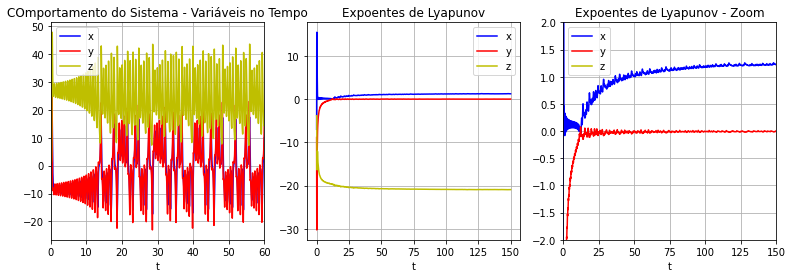

In [92]:
fig, axs = plt.subplots(ncols=3, figsize=(13,4))
ax1, ax2, ax3 = axs

ax1.plot(eixot,sol[0], c="b", label='x')
ax1.plot(eixot,sol[1],c="r", label='y');
ax1.plot(eixot,sol[2], c="y", label='z');

ax2.plot(eixot,ly_exp[0], c="b", label='x');
ax2.plot(eixot,ly_exp[1],c="r", label='y');
ax2.plot(eixot,ly_exp[2], c="y", label='z');

ax3.plot(eixot,ly_exp[0], c="b", label='x');
ax3.plot(eixot,ly_exp[1],c="r", label='y');
ax3.plot(eixot,ly_exp[2], c="y", label='z');

for ax in axs:
    ax.set_xlabel("t")
    ax.grid()
    ax.legend()

ax1.set_title("COmportamento do Sistema - Variáveis no Tempo")
ax2.set_title("Expoentes de Lyapunov")
ax3.set_title("Expoentes de Lyapunov - Zoom")

ax1.set_xlim(0,60)
ax3.set_xlim(0,150)
ax3.set_ylim(-2,2)

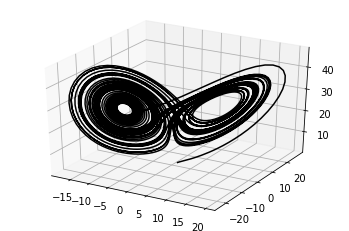

In [93]:
a1=5000
rho = 28
ax0= plt.axes(projection = '3d')
ax0.plot(sol[0][0:a1],sol[1][0:a1],sol[2][0:a1],c='k') # O ultimo s determina o tamnho do ponto plotado, não está ligado ao vetor solução s
#ax.plot(s2[0][0:a1],s2[1][0:a1],s2[2][0:a1],c='k', ls = ":")


In [94]:
u2@u3

0.0

In [95]:
X0
cum

array([ 1.82695430e+02,  7.50998508e-01, -3.14094965e+03])

## Código Geral de Execução:

Algoritmo para chamar execução - Dinâmica Clonada:

In [31]:
def chama_lyap_dinclo(n, t0, tmax,  dt, x, cum, funcao, delta): 
    
    nn = n*(n+1) # Total de equações com a parte linearizada. 

    eixot = np.arange(t0, tmax, dt)
    nt = eixot.size
    
    sol = np.zeros((nn,nt))

    ly_exp = np.zeros((n,nt))
    i = 0 
    
    for t in eixot:    
    
        #declarando o modelo
        #f = lambda s: lr_model(s, k2 = rho)
        #f = lambda s: model(s, k)
        #f = lambda s: model(s)
        
        
        #Aplicaremos o modelo as condições iniciais: f(x) e utilizaremos 
        #o vetor obtido para iniciar a iteração no Runge Kutta
        a = rka(model = funcao, s0 = x , dt = dt)
        
        #x, cum, lb = Lyapunov(x = a, cum = cum, n = 3, t = t , t0 = t0, dt = dt)
        
        x, cum, lb, u1, u2, u3 = lyapunov_clonada(x = a, cum = cum, n = n, t = t, t0 = t0, dt = dt, delta = delta)
        
    
        #Variavel que armazena as soluções
        sol[:,i] = x 
        #Variável que armazena os expoentes
        ly_exp[:, i] = lb
        i=i+1
    
    
    return sol, ly_exp, eixot
    

Especificações para rodar Sistema de Lorenz. Devemos declarar:
- Dimensão do Sistema (_n_)
- Magnitude da Distorção Inicial (_delta_) (Apenas para Dinâmica Clonada)
- Condições Iniciais (_s0_)
- Tempo de Execução (_t0, tmax e dt_)
- Sistema a ser simulado (_f0_)
    > Este é o ponto de maior atenção, por o modelo deve ser declarado como uma função separa, que retorna as derivadas de cada variável




In [32]:
def chama_lyap_wolf(n, t0, tmax,  dt, x, cum, funcao): 
    
    nn = n*(n+1) # Total de equações com a parte linearizada. 

    eixot = np.arange(t0, tmax, dt)
    nt = eixot.size
    
    sol = np.zeros((nn,nt))

    ly_exp = np.zeros((n,nt))
    i = 0 
    
    for t in eixot:    
    
        #declarando o modelo
        #f = lambda s: lr_model(s, k2 = rho)
        #f = lambda s: model(s, k)
        
        
        #Aplicaremos o modelo as condições iniciais: f(x) e utilizaremos 
        #o vetor obtido para iniciar a iteração no Runge Kutta
        a = rka(model = funcao, s0 = x , dt = dt)
        
        #x, cum, lb = Lyapunov(x = a, cum = cum, n = 3, t = t , t0 = t0, dt = dt)

        x, cum, lb, u1, u2, u3 = lyapunov_wolf(x = a, cum = cum, n = n, t = t, t0 = t0, dt = dt)
    
        #Variavel que armazena as soluções
        sol[:,i] = x 
        #Variável que armazena os expoentes
        ly_exp[:, i] = lb
        i=i+1
        
    
    return sol, ly_exp, eixot
    

### Sistema de Lorenz

In [61]:
n=3 #dimensão do sistema
nn = n*(n+1) #dimensão do sistema expandido
delta = 0.0001 #distorcao inicial para caso de dinamica clonada

s0 = np.array([1,1,1]) #condições iniciais
X0, cum  = iniciar_dinclo(s0, delta) #Condições iniciais sistema expandido

#Tempo de execução
t0 = 0.0
tmax = 150.0
dt = 0.01

#Declarando o sistema de referência: 
f0 = lambda s: lr_model(s, k1 = 10, k2= 28, k3 = 8.0/3.0)

#Generalizando Sistema: 
f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)

In [34]:
#Simulando
solucao, ly_exp, eixot = chama_lyap_dinclo(n = n, t0 = t0, tmax = tmax,  dt = dt, x = X0, cum = cum, funcao = f1, delta = delta)

In [35]:
##### Plotando Resultados - Novo Modelo: #####

(-2.0, 2.0)

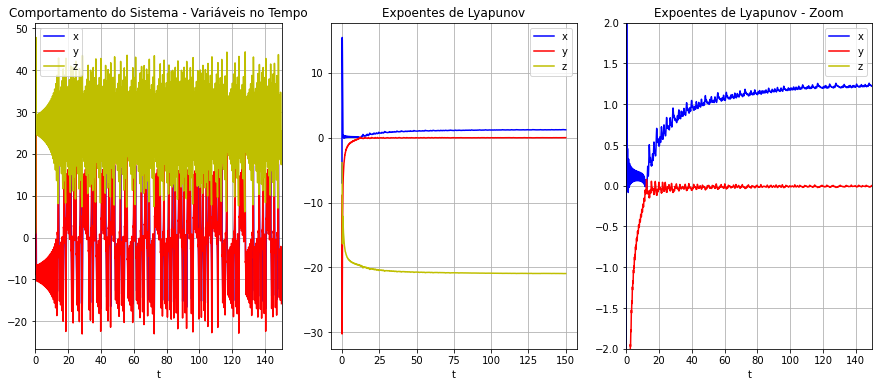

In [36]:
fig, axs = plt.subplots(ncols=3, figsize=(15,6))
ax1, ax2, ax3 = axs

ax1.plot(eixot,solucao[0], c="b", label='x')
ax1.plot(eixot,solucao[1],c="r", label='y');
ax1.plot(eixot,solucao[2], c="y", label='z');

ax2.plot(eixot,ly_exp[0], c="b", label='x');
ax2.plot(eixot,ly_exp[1],c="r", label='y');
ax2.plot(eixot,ly_exp[2], c="y", label='z');

ax3.plot(eixot,ly_exp[0], c="b", label='x');
ax3.plot(eixot,ly_exp[1],c="r", label='y');
ax3.plot(eixot,ly_exp[2], c="y", label='z');

for ax in axs:
    ax.set_xlabel("t")
    ax.grid()
    ax.legend()
    
ax1.set_title("Comportamento do Sistema - Variáveis no Tempo")
ax2.set_title("Expoentes de Lyapunov")
ax3.set_title("Expoentes de Lyapunov - Zoom")

ax1.set_xlim(0,150)
ax3.set_xlim(0,150)
ax3.set_ylim(-2,2)

#### Gráficos

In [62]:
n=3 #dimensão do sistema
nn = n*(n+1) #dimensão do sistema expandido
delta = 0.0001 #distorcao inicial para caso de dinamica clonada
s0 = np.array([1,1,1]) #condições iniciais

#Tempo de execução
t0 = 0.0
tmax = 150.0
dt = 0.01

#parâmetros a serem simulados
rhos = [10,15,20,28]
li_sol = list()
li_exp = list()
li_t = list()

for rho in rhos: 

    X0, cum  = iniciar_dinclo(s0, delta) #Condições iniciais sistema expandido

    #Declarando o sistema de referência: 
    f0 = lambda s: lr_model(s, k1 = 10, k2= rho, k3 = 8.0/3.0)

    #Generalizando Sistema: 
    f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)
    

    solucao, ly_exp, eixot = chama_lyap_dinclo(n = n, t0 = t0, tmax = tmax,  dt = dt, x = X0, cum = cum, funcao = f1, delta = delta)
    
    li_sol.append(solucao)
    li_exp.append(ly_exp)
    li_t.append(eixot)
     

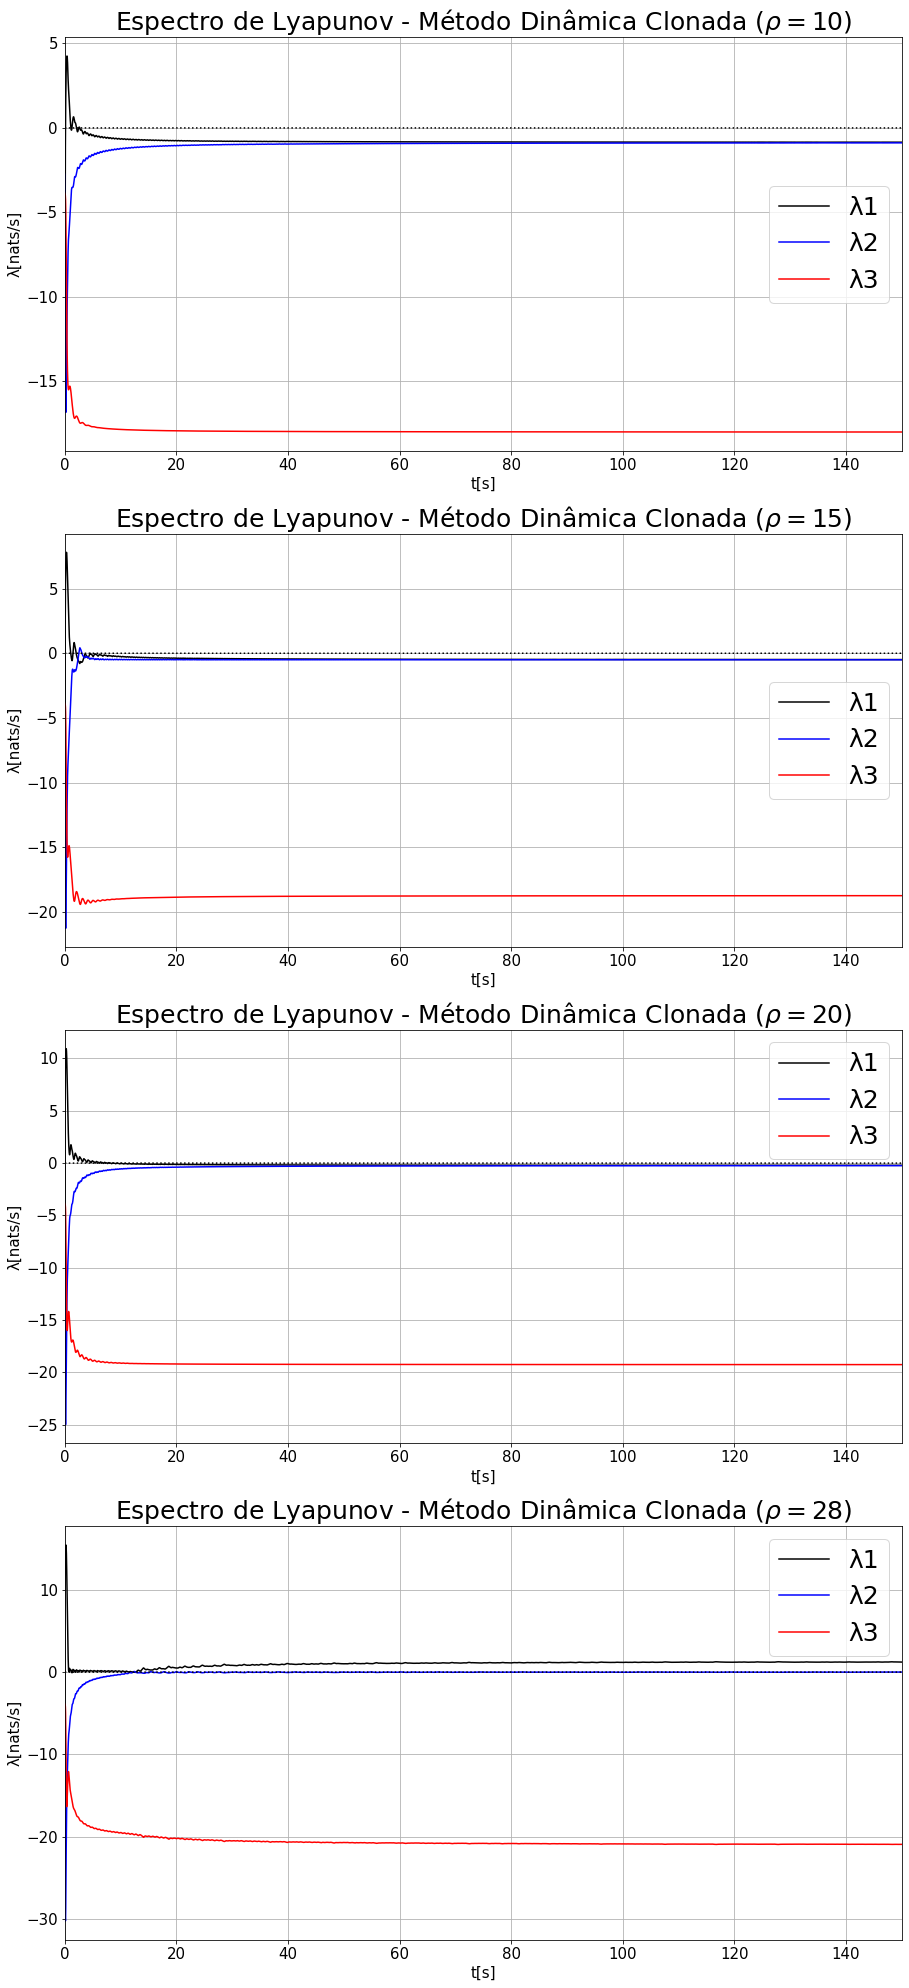

In [63]:
n_graf = len(rhos)

fig, axs = plt.subplots(nrows=n_graf, ncols=1, figsize=(15,35))

SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



for i in range(n_graf):
    axs[i].plot(li_t[i],li_exp[i][0], label = 'λ1', c = 'k')
    axs[i].plot(li_t[i],li_exp[i][1], label = 'λ2', c = 'b')
    axs[i].plot(li_t[i],li_exp[i][2], label = 'λ3', c = 'r')
    axs[i].plot(li_t[i],np.zeros(len(li_t[i])), c='k', ls = ':', lw = 1.5)
    
    axs[i].set_xlabel("t[s]")
    axs[i].set_ylabel("λ[nats/s]")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_title('Espectro de Lyapunov - Método Dinâmica Clonada ('r'$\rho= %.0f)$' %rhos[i])
    axs[i].set_xlim(0,150)

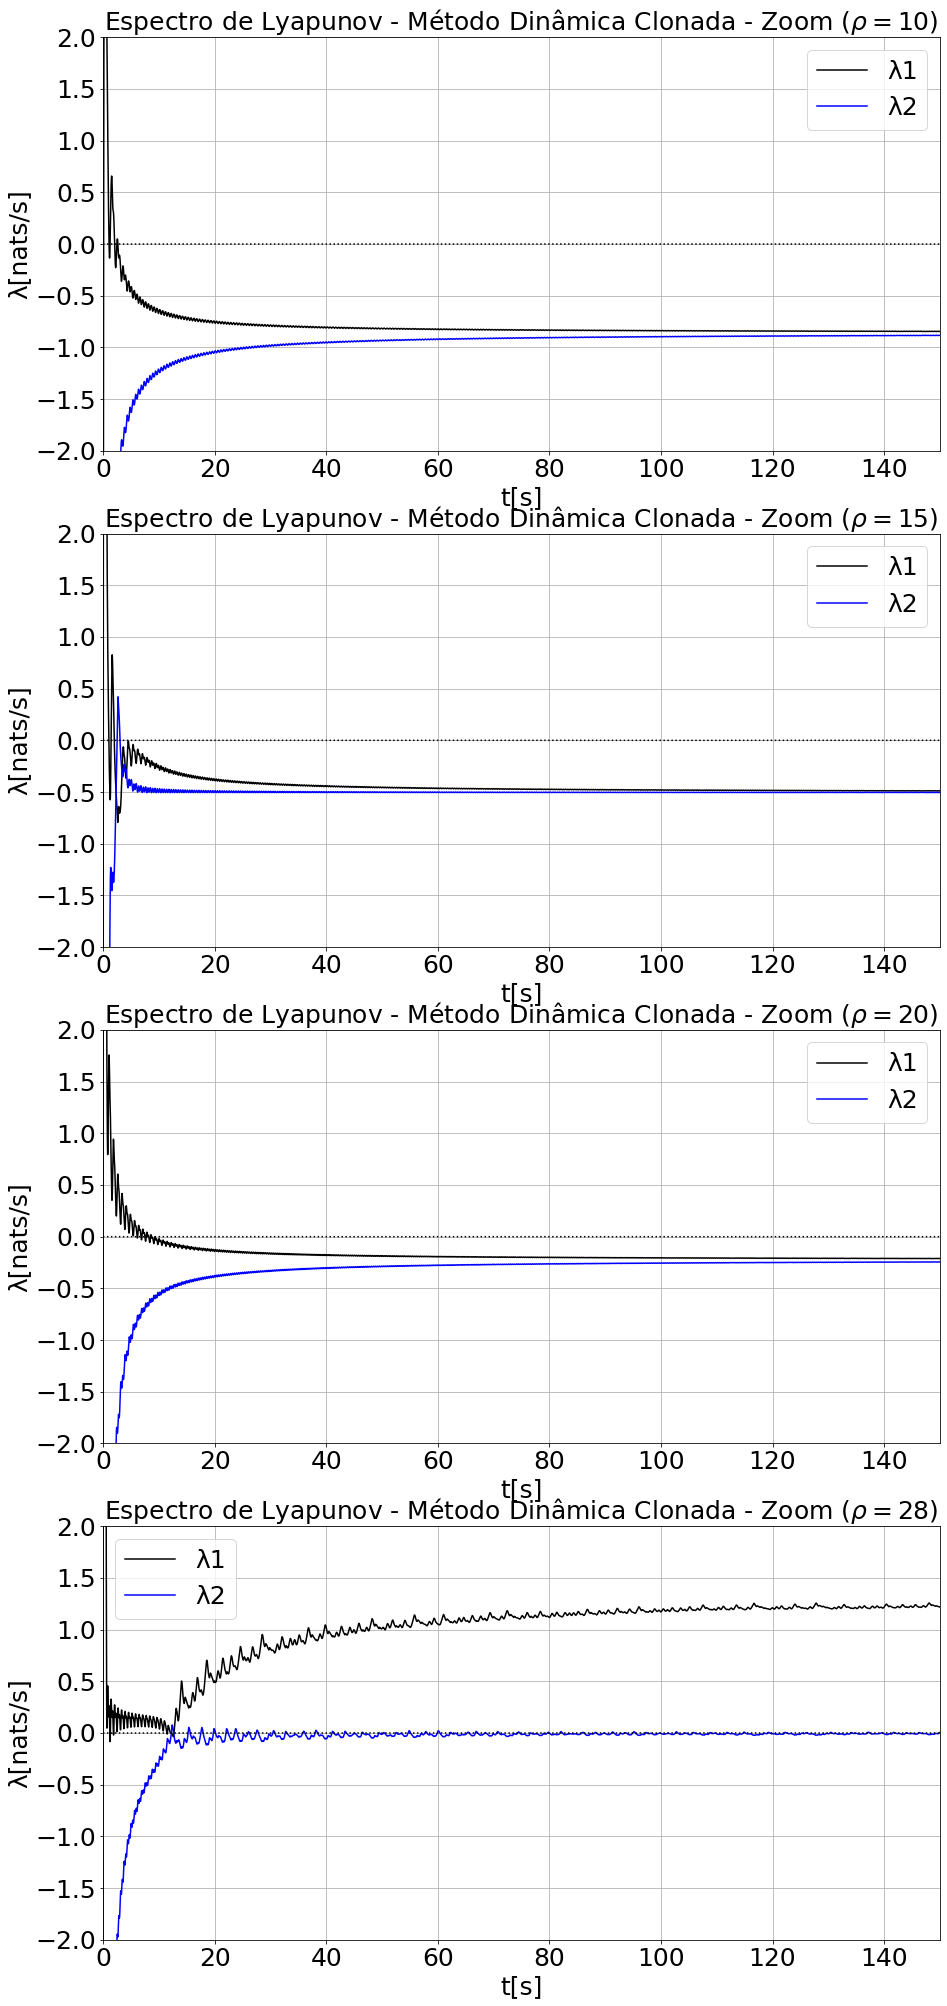

In [64]:
n_graf = len(rhos)

fig, axs = plt.subplots(nrows=n_graf, ncols=1, figsize=(15,35))

SMALL_SIZE = 25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



for i in range(n_graf):
    axs[i].plot(li_t[i],li_exp[i][0], label = 'λ1', c = 'k')
    axs[i].plot(li_t[i],li_exp[i][1], label = 'λ2', c = 'b')
    #axs[i].plot(li_t[i],li_exp[i][2], label = 'λ3', c = 'r')
    axs[i].plot(li_t[i],np.zeros(len(li_t[i])), c='k', ls = ':', lw = 1.5)
    
    axs[i].set_xlabel("t[s]")
    axs[i].set_ylabel("λ[nats/s]")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_title('Espectro de Lyapunov - Método Dinâmica Clonada - Zoom ('r'$\rho= %.0f)$' %rhos[i])
    axs[i].set_xlim(0,150)
    axs[i].set_ylim(-2,+2)


In [65]:
n_graf = len(rhos)
li_tabela = list()
for i in range(n_graf):
    
    info = li_exp[i][:,-1]
    li = list(info)
    li = [rhos[i]] + li 
    li_tabela.append(li)

    
    
li_tabela

tabela = tabulate(li_tabela, headers=['ρ','λ1','λ2','λ3'], tablefmt='fancy_grid', floatfmt=".2f", colalign=("center",))
print(tabela)

╒═════╤═══════╤═══════╤════════╕
│  ρ  │    λ1 │    λ2 │     λ3 │
╞═════╪═══════╪═══════╪════════╡
│ 10  │ -0.85 │ -0.88 │ -17.99 │
├─────┼───────┼───────┼────────┤
│ 15  │ -0.49 │ -0.51 │ -18.72 │
├─────┼───────┼───────┼────────┤
│ 20  │ -0.21 │ -0.25 │ -19.26 │
├─────┼───────┼───────┼────────┤
│ 28  │  1.22 │  0.01 │ -20.94 │
╘═════╧═══════╧═══════╧════════╛


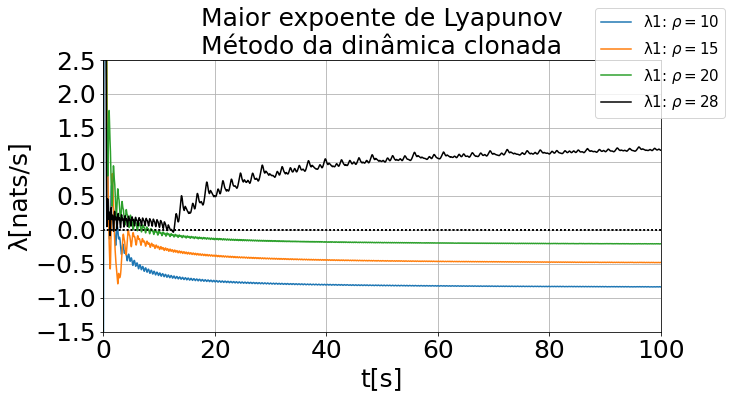

In [66]:
fig = plt.figure(figsize=(10, 5))
cores= ['tab:blue','tab:orange','tab:green','k']

plt.xlim(0,100)
plt.ylim(-1.5,2.5)
plt.title('Maior expoente de Lyapunov\nMétodo da dinâmica clonada')


SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title



for i in range(n_graf):
    
    plt.plot(li_t[i],li_exp[i][0],label = 'λ1: 'r'$\rho= %.0f$' %rhos[i], c=cores[i])
    plt.plot(li_t[i],np.zeros(len(li_t[i])), c='k', ls = ':', lw = 1.5)

fig.legend()

plt.grid()
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.show()


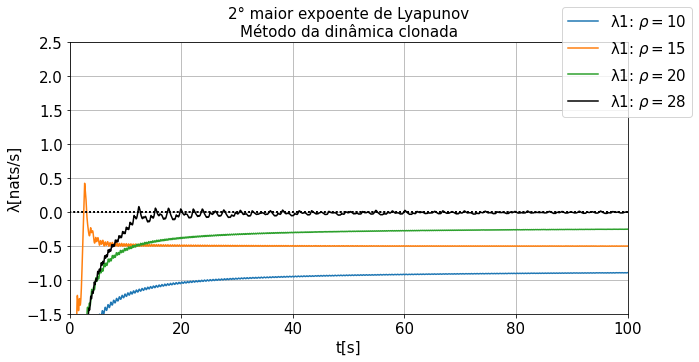

In [67]:
fig = plt.figure(figsize=(10, 5))
cores= ['tab:blue','tab:orange','tab:green','k']

plt.xlim(0,100)
plt.ylim(-1.5,2.5)
plt.title('2° maior expoente de Lyapunov\nMétodo da dinâmica clonada')


SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25


plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title



for i in range(n_graf):
    
    plt.plot(li_t[i],li_exp[i][1],label = 'λ1: 'r'$\rho= %.0f$' %rhos[i], c=cores[i])
    plt.plot(li_t[i],np.zeros(len(li_t[i])), c='k', ls = ':', lw = 1.5)

fig.legend()

plt.grid()
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.show()

C:\Users\joaoc\anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Text(0.5, 0.98, 'Espectro de Lyapunov\n Método da dinâmica clonada')

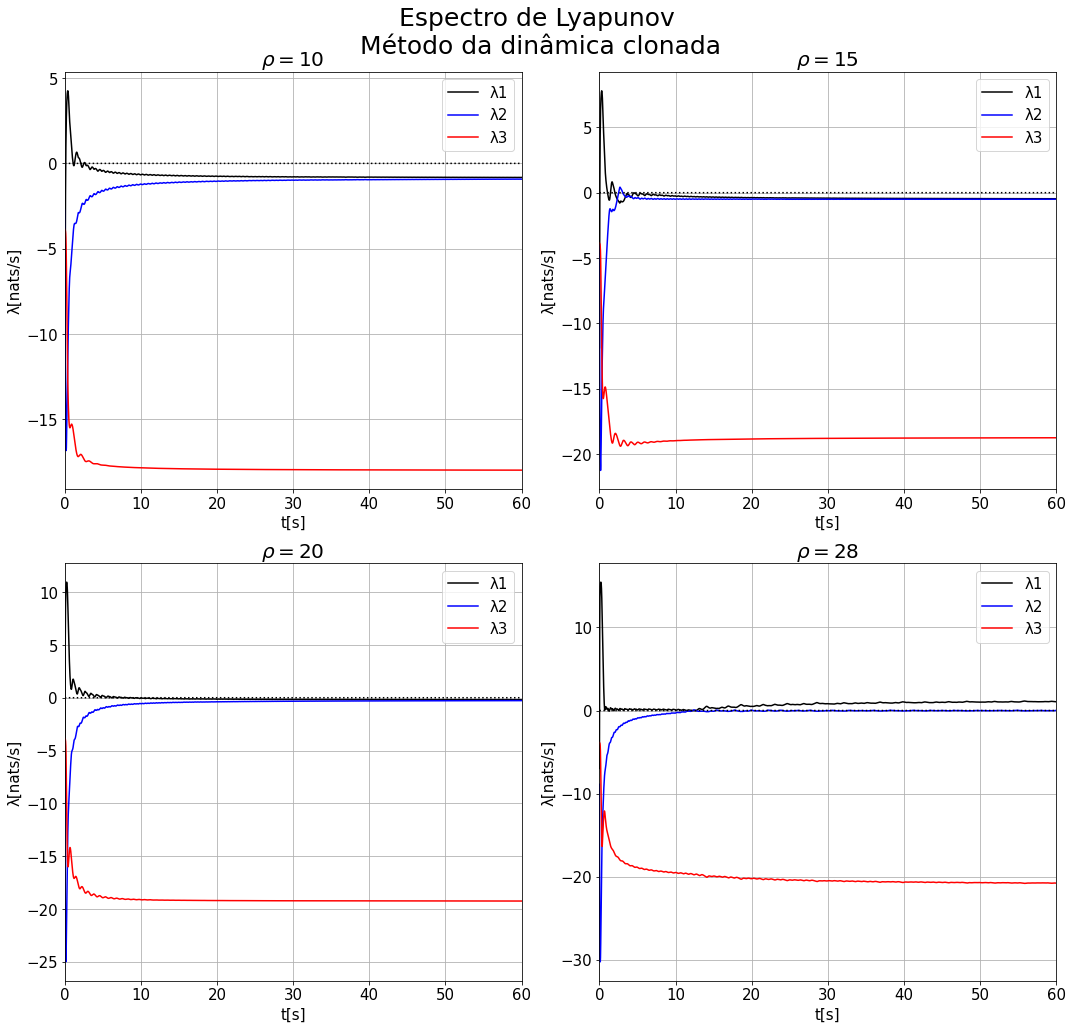

In [51]:
#####Especifico para o Trabalho: 

#n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15), constrained_layout = True)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title




axs[0,0].plot(li_t[0],li_exp[0][0], label = 'λ1', c = 'k')
axs[0,0].plot(li_t[0],li_exp[0][1], label = 'λ2', c = 'b')
axs[0,0].plot(li_t[0],li_exp[0][2], label = 'λ3', c = 'r')
axs[0,0].plot(li_t[0],np.zeros(len(li_t[0])), c='k', ls = ':', lw = 1.5)

axs[0,1].plot(li_t[1],li_exp[1][0], label = 'λ1', c = 'k')
axs[0,1].plot(li_t[1],li_exp[1][1], label = 'λ2', c = 'b')
axs[0,1].plot(li_t[1],li_exp[1][2], label = 'λ3', c = 'r')
axs[0,1].plot(li_t[1],np.zeros(len(li_t[1])), c='k', ls = ':', lw = 1.5)

axs[1,0].plot(li_t[2],li_exp[2][0], label = 'λ1', c = 'k')
axs[1,0].plot(li_t[2],li_exp[2][1], label = 'λ2', c = 'b')
axs[1,0].plot(li_t[2],li_exp[2][2], label = 'λ3', c = 'r')
axs[1,0].plot(li_t[2],np.zeros(len(li_t[2])), c='k', ls = ':', lw = 1.5)

axs[1,1].plot(li_t[3],li_exp[3][0], label = 'λ1', c = 'k')
axs[1,1].plot(li_t[3],li_exp[3][1], label = 'λ2', c = 'b')
axs[1,1].plot(li_t[3],li_exp[3][2], label = 'λ3', c = 'r')
axs[1,1].plot(li_t[3],np.zeros(len(li_t[3])), c='k', ls = ':', lw = 1.5)

i=0
for ax in axs.flatten(): 
    
    ax.set_xlabel
    ax.set_xlabel("t[s]")
    ax.set_ylabel("λ[nats/s]")
    ax.grid()
    ax.legend()
    ax.set_title(''r'$\rho= %.0f$' %rhos[i], size = 20)
    ax.set_xlim(0,60)
    
    i = i+1

#fig.tight_layout(pad=2.0)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


fig.suptitle('Espectro de Lyapunov\n Método da dinâmica clonada')

C:\Users\joaoc\anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


Text(0.5, 0.98, 'Espectro de Lyapunov (dois maiores expoentes)\n Método da dinâmica clonada')

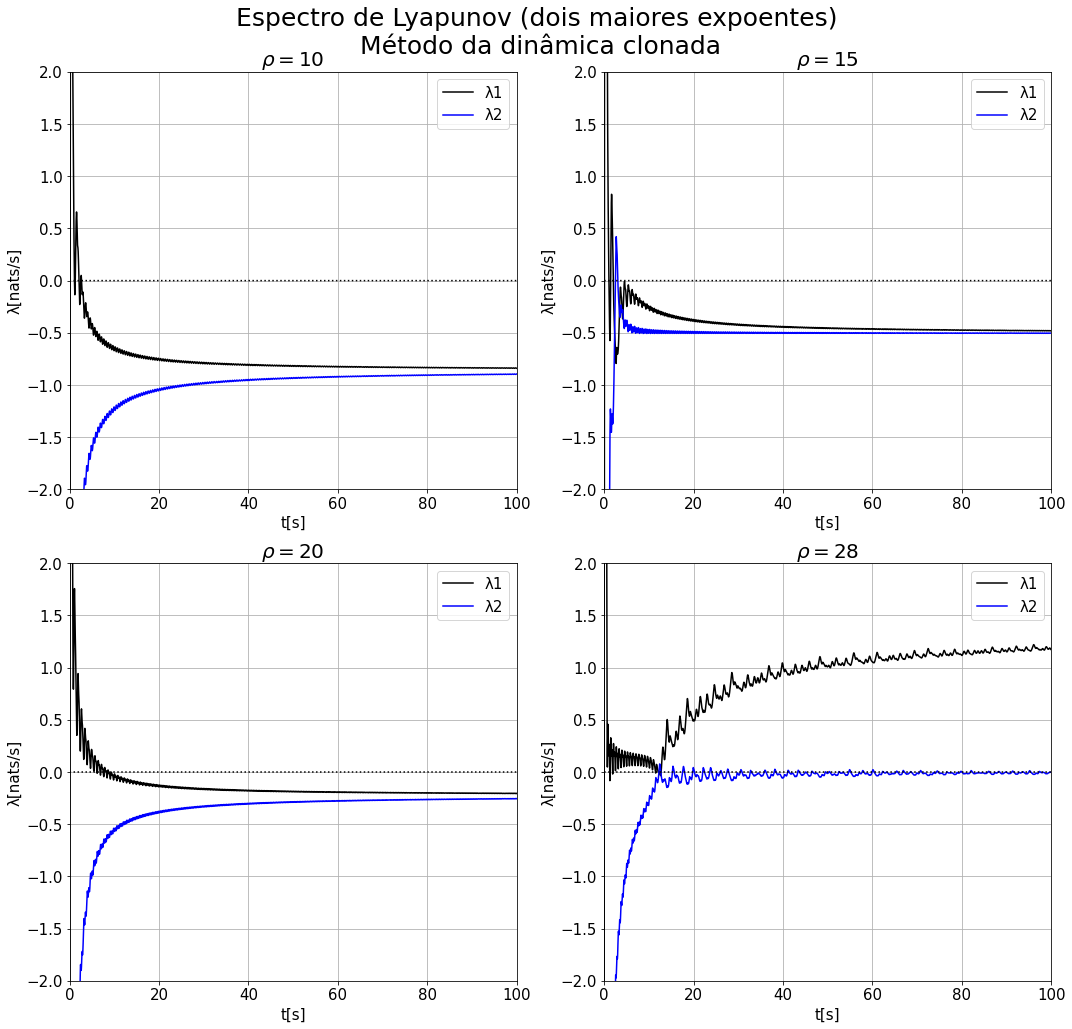

In [52]:
#####Especifico para o Trabalho: 

#n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15), constrained_layout = True)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title




axs[0,0].plot(li_t[0],li_exp[0][0], label = 'λ1', c = 'k')
axs[0,0].plot(li_t[0],li_exp[0][1], label = 'λ2', c = 'b')
#axs[0,0].plot(li_t[0],li_exp[0][2], label = 'λ3', c = 'r')
axs[0,0].plot(li_t[0],np.zeros(len(li_t[0])), c='k', ls = ':', lw = 1.5)

axs[0,1].plot(li_t[1],li_exp[1][0], label = 'λ1', c = 'k')
axs[0,1].plot(li_t[1],li_exp[1][1], label = 'λ2', c = 'b')
#axs[0,1].plot(li_t[1],li_exp[1][2], label = 'λ3', c = 'r')
axs[0,1].plot(li_t[1],np.zeros(len(li_t[1])), c='k', ls = ':', lw = 1.5)

axs[1,0].plot(li_t[2],li_exp[2][0], label = 'λ1', c = 'k')
axs[1,0].plot(li_t[2],li_exp[2][1], label = 'λ2', c = 'b')
#axs[1,0].plot(li_t[2],li_exp[2][2], label = 'λ3', c = 'r')
axs[1,0].plot(li_t[2],np.zeros(len(li_t[2])), c='k', ls = ':', lw = 1.5)

axs[1,1].plot(li_t[3],li_exp[3][0], label = 'λ1', c = 'k')
axs[1,1].plot(li_t[3],li_exp[3][1], label = 'λ2', c = 'b')
#axs[1,1].plot(li_t[3],li_exp[3][2], label = 'λ3', c = 'r')
axs[1,1].plot(li_t[3],np.zeros(len(li_t[3])), c='k', ls = ':', lw = 1.5)

i=0
for ax in axs.flatten(): 
    
    ax.set_xlabel
    ax.set_xlabel("t[s]")
    ax.set_ylabel("λ[nats/s]")
    ax.grid()
    ax.legend()
    ax.set_title(''r'$\rho= %.0f$' %rhos[i], size = 20)
    ax.set_xlim(0,100)
    ax.set_ylim(-2,2)
    
    i = i+1

#fig.tight_layout(pad=2.0)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


fig.suptitle('Espectro de Lyapunov (dois maiores expoentes)\n Método da dinâmica clonada')

In [116]:
rhos

[10, 15, 20, 28]

### Sistema Pêndulo Duplo: 

In [68]:
n=4 #dimensão do sistema
nn = n*(n+1) #dimensão do sistema expandido
delta = 0.0001 #distorcao inicial para caso de dinamica clonada

s0 = np.array([math.pi/3,0,0,0]) #condições iniciais
X0, cum  = iniciar_dinclo(s0, delta) #Condições iniciais sistema expandido

#Tempo de execução
t0 = 0.0
tmax = 150.0
dt = 0.01

#Declarando o sistema de referência: 
f0 = lambda s: pendulum_model(s, m1 = 2.0, m2 = 2.0, L01 = 1.0, L12 = 1.0)

#Generalizando Sistema: 
f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)

In [69]:
#Simulando para não caotico
solucao, ly_exp, eixot = chama_lyap_dinclo(n = n, t0 = t0, tmax = tmax,  dt = dt, x = X0, cum = cum, funcao = f1, delta = delta)

In [70]:
#Simulando para caotico
s0_c = np.array([math.pi/2,0,0,0]) #condições iniciais
X0_c, cum_c  = iniciar_dinclo(s0_c, delta) #Condições iniciais sistema expandido

solucao_c, ly_exp_c, eixot_c = chama_lyap_dinclo(n = n, t0 = t0, tmax = tmax,  dt = dt, x = X0_c, cum = cum_c, funcao = f1, delta = delta)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


(-2.0, 2.0)

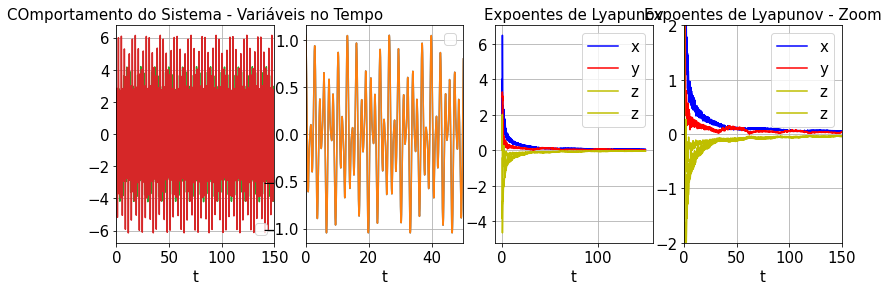

In [71]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(13,4))
ax1, ax2, ax3, ax4 = axs

### Plotando Variaveis do Sistema
for i in range(n):
    ax1.plot(eixot,solucao[i])
    #ax1.plot(eixot,solucao[1],c="r", label='y');
    #ax1.plot(eixot,solucao[2], c="y", label='z');
    
ax2.plot(eixot,solucao[0])
ax2.plot(eixot,solucao[n])


ax3.plot(eixot,ly_exp[0], c="b", label='x');
ax3.plot(eixot,ly_exp[1],c="r", label='y');
ax3.plot(eixot,ly_exp[2], c="y", label='z');
ax3.plot(eixot,ly_exp[3], c="y", label='z');

ax4.plot(eixot,ly_exp[0], c="b", label='x');
ax4.plot(eixot,ly_exp[1],c="r", label='y');
ax4.plot(eixot,ly_exp[2], c="y", label='z');
ax4.plot(eixot,ly_exp[3], c="y", label='z');

for ax in axs:
    ax.set_xlabel("t")
    ax.grid()
    ax.legend()
    
ax1.set_title("COmportamento do Sistema - Variáveis no Tempo")
ax3.set_title("Expoentes de Lyapunov")
ax4.set_title("Expoentes de Lyapunov - Zoom")

ax1.set_xlim(0,150)
ax2.set_xlim(0,50)
ax4.set_xlim(0,150)
ax4.set_ylim(-2,2)

In [72]:
axs[0]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, '$\\omega_1$')

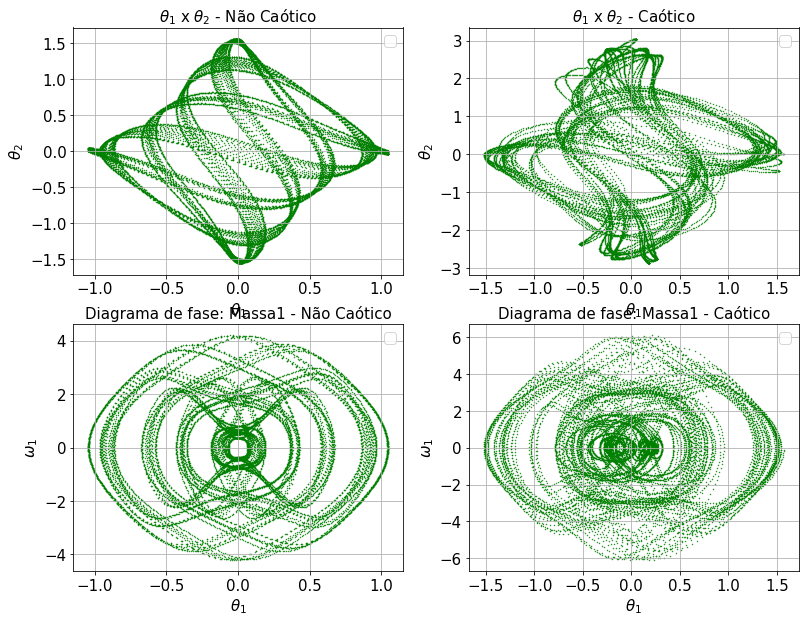

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13,10))
[ax1, ax2], [ax3, ax4] = axs

ax1.scatter(solucao[0], solucao[1], s=0.2, c='g')
ax3.scatter(solucao[0], solucao[2], s=0.2, c='g')

ax2.scatter(solucao_c[0], solucao_c[1], s=0.2, c='g')
ax4.scatter(solucao_c[0], solucao_c[2], s=0.2, c='g')


for i in range(len(axs)):
    for ax in axs[i]:
        ax.set_xlabel(''r'$\theta_1$')
        ax.grid()
        ax.legend()

ax1.set_title(''r'$\theta_1$ x 'r'$\theta_2$ - Não Caótico')
ax3.set_title("Diagrama de fase: Massa1 - Não Caótico")
ax2.set_title(''r'$\theta_1$ x 'r'$\theta_2$ - Caótico')
ax4.set_title("Diagrama de fase: Massa1 - Caótico")

ax1.set_ylabel(''r'$\theta_2$')
ax2.set_ylabel(''r'$\theta_2$')
ax3.set_ylabel(''r'$\omega_1$')
ax4.set_ylabel(''r'$\omega_1$')

#ax1.set_xlim(0,150)
#ax2.set_xlim(0,50)
#ax4.set_xlim(0,150)
#ax4.set_ylim(-2,2)

#### Gráficos - Sistema Pêndulo Duplo: 

In [74]:
### Gráficos

n=4 #dimensão do sistema
nn = n*(n+1) #dimensão do sistema expandido
delta = 0.0001 #distorcao inicial para caso de dinamica clonada

#Tempo de execução
t0 = 0.0
tmax = 150.0
dt = 0.01

#parâmetros a serem simulados
thetas = [30.0, 45.0, 60.0, 75.0, 90.0]
thetas_rad = [angulo_graus * math.pi/180 for angulo_graus in thetas]
li_sol_pend = list()
li_exp_pend = list()
li_t_pend = list()

for theta in thetas_rad:

    s0 = np.array([theta,0,0,0]) #condições iniciais
    X0, cum  = iniciar_dinclo(s0, delta) #Condições iniciais sistema expandido


    #Declarando o sistema de referência: 
    f0 = lambda s: pendulum_model(s, m1 = 2.0, m2 = 2.0, L01 = 1.0, L12 = 1.0)

    #Generalizando Sistema: 
    f1 = lambda s: model_gener_DinClonada(s,n=n, model = f0)

    solucao, ly_exp, eixot = chama_lyap_dinclo(n = n, t0 = t0, tmax = tmax,  dt = dt, x = X0, cum = cum, funcao = f1, delta = delta)

    li_sol_pend.append(solucao)
    li_exp_pend.append(ly_exp)
    li_t_pend.append(eixot)

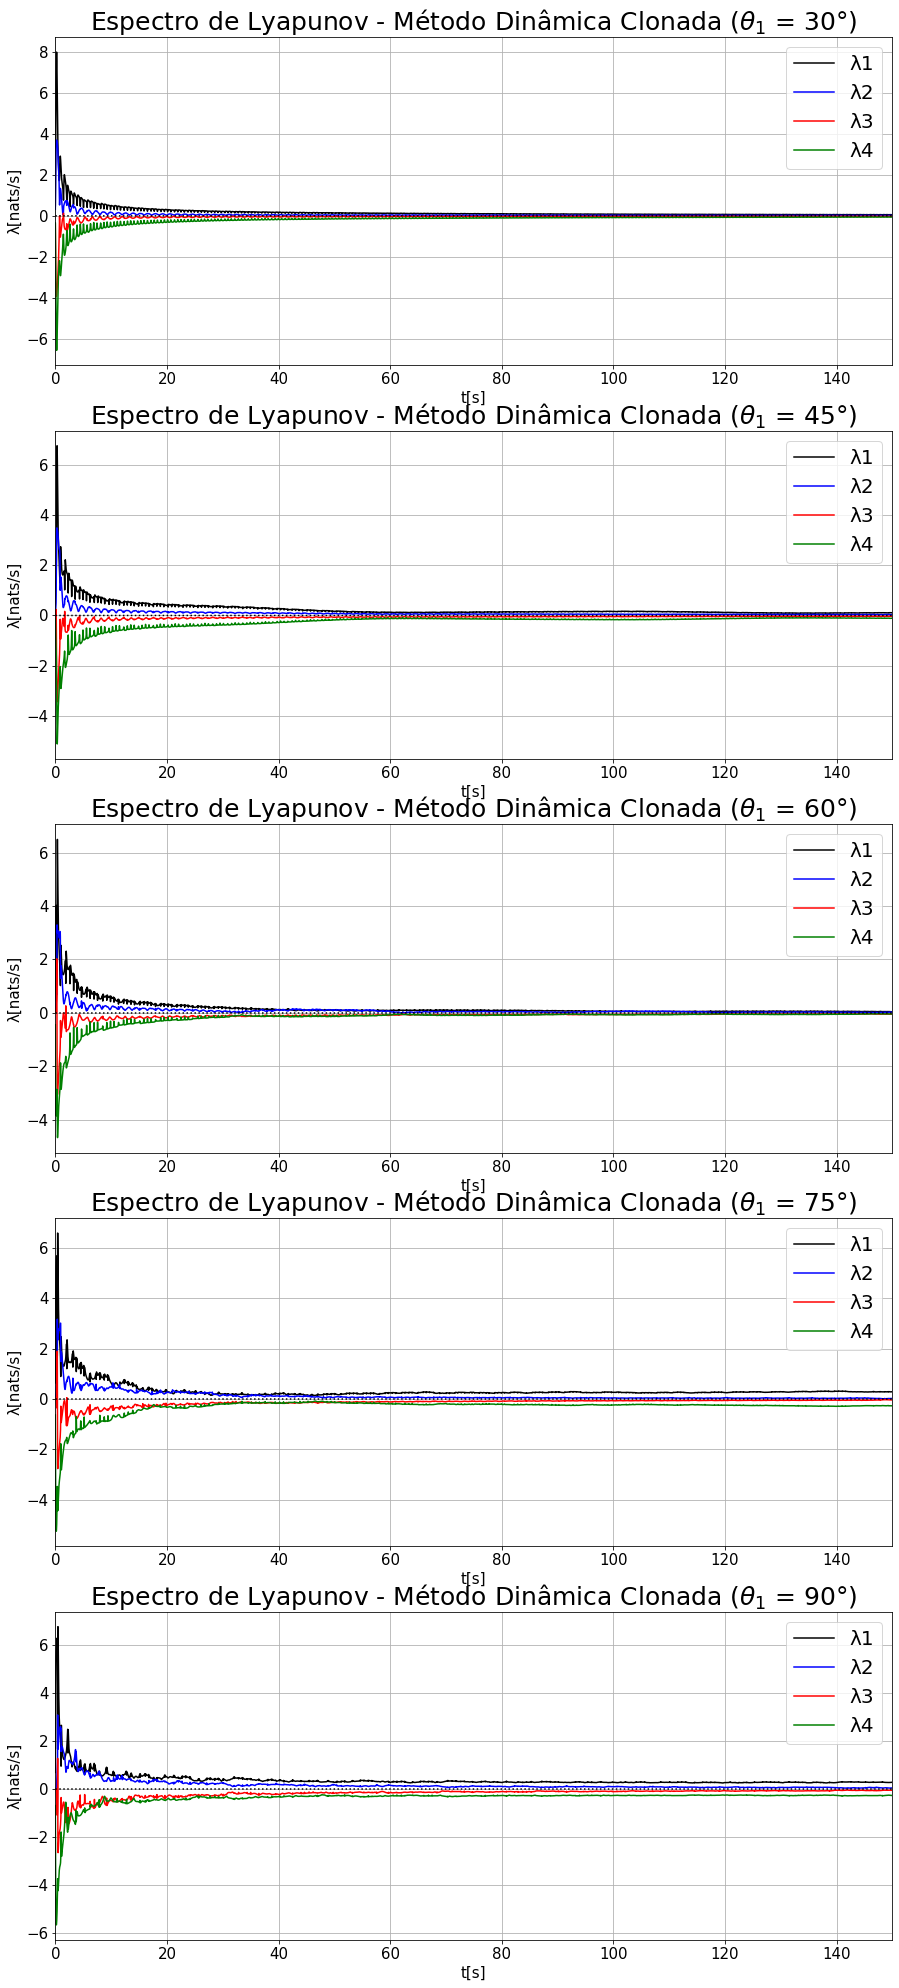

In [75]:
n_graf = len(thetas)

fig, axs = plt.subplots(nrows=n_graf, ncols=1, figsize=(15,35))

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



for i in range(n_graf):
    axs[i].plot(li_t_pend[i],li_exp_pend[i][0], label = 'λ1', c = 'k')
    axs[i].plot(li_t_pend[i],li_exp_pend[i][1], label = 'λ2', c = 'b')
    axs[i].plot(li_t_pend[i],li_exp_pend[i][2], label = 'λ3', c = 'r')
    axs[i].plot(li_t_pend[i],li_exp_pend[i][3], label = 'λ4', c = 'g')
    axs[i].plot(li_t_pend[i],np.zeros(len(li_t_pend[i])), c='k', ls = ':', lw = 1.5)
    
    axs[i].set_xlabel("t[s]")
    axs[i].set_ylabel("λ[nats/s]")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_title('Espectro de Lyapunov - Método Dinâmica Clonada ('r'$\theta_1$ = %.0f°)' %thetas[i])
    axs[i].set_xlim(0,150)

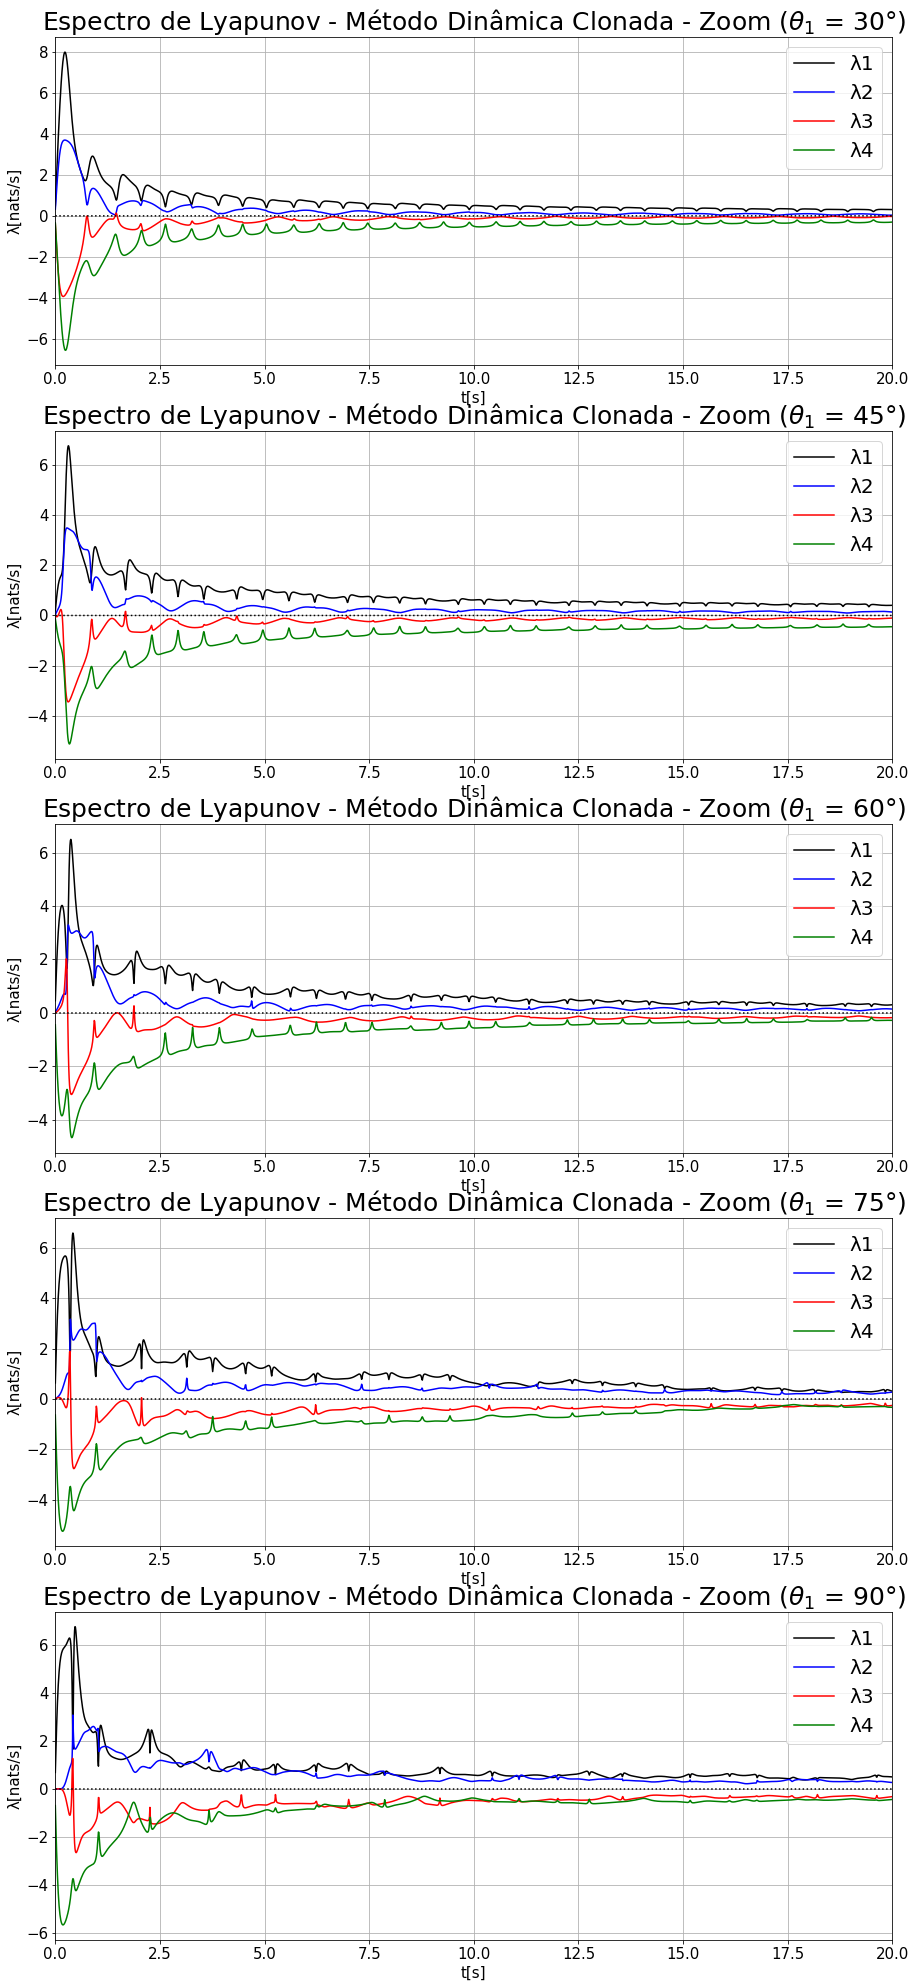

In [91]:
n_graf = len(thetas)

fig, axs = plt.subplots(nrows=n_graf, ncols=1, figsize=(15,35))

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



for i in range(n_graf):
    axs[i].plot(li_t_pend[i],li_exp_pend[i][0], label = 'λ1', c = 'k')
    axs[i].plot(li_t_pend[i],li_exp_pend[i][1], label = 'λ2', c = 'b')
    axs[i].plot(li_t_pend[i],li_exp_pend[i][2], label = 'λ3', c = 'r')
    axs[i].plot(li_t_pend[i],li_exp_pend[i][3], label = 'λ4', c = 'g')
    axs[i].plot(li_t_pend[i],np.zeros(len(li_t_pend[i])), c='k', ls = ':', lw = 1.5)
    
    axs[i].set_xlabel("t[s]")
    axs[i].set_ylabel("λ[nats/s]")
    axs[i].grid()
    axs[i].legend()
    axs[i].set_title('Espectro de Lyapunov - Método Dinâmica Clonada - Zoom ('r'$\theta_1$ = %.0f°)' %thetas[i])
    axs[i].set_xlim(0,20)

In [160]:
### TABELA

n_graf = len(thetas)
li_tabela_pend = list()
for i in range(n_graf):
    
    info = li_exp_pend[i][:,-1]
    li = list(info)
    li = [thetas[i]] + li 
    li_tabela_pend.append(li)

    
    
li_tabela_pend

tabela = tabulate(li_tabela_pend, headers=['θ1','λ1','λ2','λ3','λ4'], tablefmt='fancy_grid', floatfmt=".2f", colalign=("center",))
print(tabela)

╒═══════╤══════╤══════╤═══════╤═══════╕
│  θ1   │   λ1 │   λ2 │    λ3 │    λ4 │
╞═══════╪══════╪══════╪═══════╪═══════╡
│ 30.00 │ 0.06 │ 0.02 │ -0.02 │ -0.05 │
├───────┼──────┼──────┼───────┼───────┤
│ 45.00 │ 0.10 │ 0.04 │ -0.03 │ -0.10 │
├───────┼──────┼──────┼───────┼───────┤
│ 60.00 │ 0.05 │ 0.04 │ -0.04 │ -0.04 │
├───────┼──────┼──────┼───────┼───────┤
│ 75.00 │ 0.29 │ 0.02 │ -0.04 │ -0.27 │
├───────┼──────┼──────┼───────┼───────┤
│ 90.00 │ 0.28 │ 0.04 │ -0.05 │ -0.27 │
╘═══════╧══════╧══════╧═══════╧═══════╛


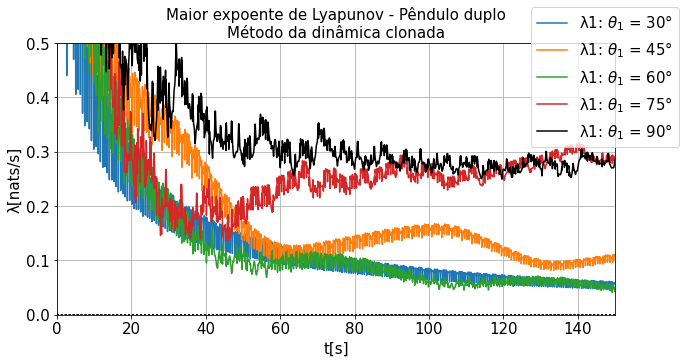

In [90]:
fig = plt.figure(figsize=(10, 5))
cores= ['tab:blue','tab:orange','tab:green','tab:red','k']

plt.xlim(0,150)
plt.ylim(-1.5,2.5)
plt.title('Maior expoente de Lyapunov - Pêndulo duplo\nMétodo da dinâmica clonada')


SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25


plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title



for i in range(n_graf):
    
    plt.plot(li_t_pend[i],li_exp_pend[i][0],label = 'λ1: 'r'$\theta_1$ = %.0f°' %thetas[i], c=cores[i])
    plt.plot(li_t_pend[i],np.zeros(len(li_t_pend[i])), c='k', ls = ':', lw = 1.5)

fig.legend()

plt.grid()
plt.ylim(-0,0.5)
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.show()


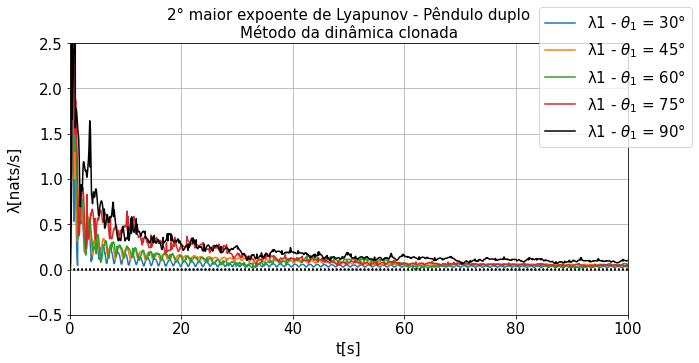

In [98]:
fig = plt.figure(figsize=(10, 5))
cores= ['tab:blue','tab:orange','tab:green','tab:red','k']

plt.xlim(0,100)
plt.ylim(-1.5,2.5)
plt.title('2° maior expoente de Lyapunov - Pêndulo duplo\nMétodo da dinâmica clonada')


SMALL_SIZE = 13
MEDIUM_SIZE = 18
BIGGER_SIZE = 25



plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title


for i in range(n_graf):
    
    plt.plot(li_t_pend[i],li_exp_pend[i][1],label = 'λ1 - 'r'$\theta_1$ = %.0f°' %thetas[i], c=cores[i])
    plt.plot(li_t_pend[i],np.zeros(len(li_t_pend[i])), c='k', ls = ':', lw = 1.5)

fig.legend()

plt.grid()
plt.ylim(-0.5,2.5)
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.show()

In [363]:
ly_exp[:,-1]

array([ 0.04969214,  0.03504526, -0.04279015, -0.0377526 ])

In [ ]:
#####Especifico para o Trabalho: 

#n_graf = len(l_rho_i)

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15), constrained_layout = True)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title


axs[0,0].plot(li_t_pend[0],li_exp_pend[0][0], label = 'λ1', c = 'k')
axs[0,0].plot(li_t_pend[0],li_exp_pend[0][1], label = 'λ2', c = 'b')
axs[0,0].plot(li_t_pend[0],li_exp_pend[0][2], label = 'λ3', c = 'r')
axs[0,0].plot(li_t_pend[0],li_exp_pend[0][2], label = 'λ4', c = 'g')
axs[0,0].plot(li_t_pend[0],np.zeros(len(li_t_pend[0])), c='k', ls = ':', lw = 1.5)

axs[0,1].plot(li_t_pend[1],li_exp_pend[1][0], label = 'λ1', c = 'k')
axs[0,1].plot(li_t_pend[1],li_exp_pend[1][1], label = 'λ2', c = 'b')
axs[0,1].plot(li_t_pend[1],li_exp_pend[1][2], label = 'λ3', c = 'r')
axs[0,1].plot(li_t_pend[1],np.zeros(len(li_t_pend[1])), c='k', ls = ':', lw = 1.5)

axs[1,0].plot(li_t_pend[2],li_exp_pend[2][0], label = 'λ1', c = 'k')
axs[1,0].plot(li_t_pend[2],li_exp_pend[2][1], label = 'λ2', c = 'b')
axs[1,0].plot(li_t_pend[2],li_exp_pend[2][2], label = 'λ3', c = 'r')
axs[1,0].plot(li_t_pend[2],np.zeros(len(li_t_pend[2])), c='k', ls = ':', lw = 1.5)

axs[1,1].plot(li_t_pend[3],li_exp_pend[3][0], label = 'λ1', c = 'k')
axs[1,1].plot(li_t_pend[3],li_exp_pend[3][1], label = 'λ2', c = 'b')
axs[1,1].plot(li_t_pend[3],li_exp_pend[3][2], label = 'λ3', c = 'r')
axs[1,1].plot(li_t_pend[3],np.zeros(len(li_t_pend[3])), c='k', ls = ':', lw = 1.5)

i=0
for ax in axs.flatten(): 
    
    ax.set_xlabel
    ax.set_xlabel("t[s]")
    ax.set_ylabel("λ[nats/s]")
    ax.grid()
    ax.legend()
    ax.set_title(''r'$\rho= %.0f$' %rhos[i], size = 20)
    ax.set_xlim(0,60)
    
    i = i+1

#fig.tight_layout(pad=2.0)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])


fig.suptitle('Espectro de Lyapunov\n Método da dinâmica clonada')

Text(0.5, 1.0, '$\\theta_1$ = 90°')

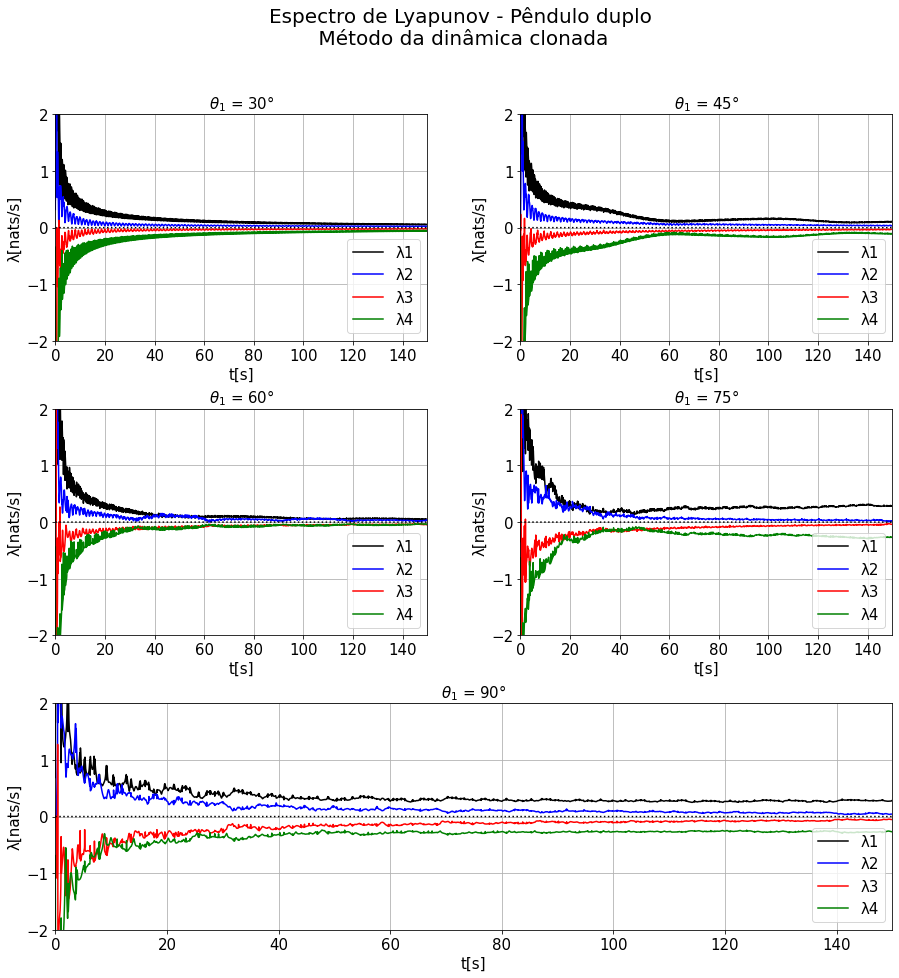

In [115]:
fig = plt.figure(figsize=(15, 15))

rows = 3
columns = 2

ylim1, ylim2 = -2, 2 
xlim1, xlim2 = 0, 150


grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .3)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

fig.suptitle('Espectro de Lyapunov - Pêndulo duplo\n Método da dinâmica clonada')

plt.subplot(grid[0, 0])
plt.plot(li_t_pend[0],li_exp_pend[0][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[0],li_exp_pend[0][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[0],li_exp_pend[0][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[0],li_exp_pend[0][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[0],np.zeros(len(li_t_pend[0])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[0])

plt.subplot(grid[0, 1])
plt.plot(li_t_pend[1],li_exp_pend[1][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[1],li_exp_pend[1][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[1],li_exp_pend[1][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[1],li_exp_pend[1][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[1],np.zeros(len(li_t_pend[1])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[1])

plt.subplot(grid[1, 0])
plt.plot(li_t_pend[2],li_exp_pend[2][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[2],li_exp_pend[2][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[2],li_exp_pend[2][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[2],li_exp_pend[2][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[2],np.zeros(len(li_t_pend[2])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[2])

plt.subplot(grid[1, 1])
plt.plot(li_t_pend[3],li_exp_pend[3][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[3],li_exp_pend[3][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[3],li_exp_pend[3][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[3],li_exp_pend[3][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[3],np.zeros(len(li_t_pend[3])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[3])

plt.subplot(grid[2, :])
plt.plot(li_t_pend[4],li_exp_pend[4][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[4],li_exp_pend[4][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[4],li_exp_pend[4][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[4],li_exp_pend[4][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[4],np.zeros(len(li_t_pend[4])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[4])

Text(0.5, 1.0, '$\\theta_1$ = 90°')

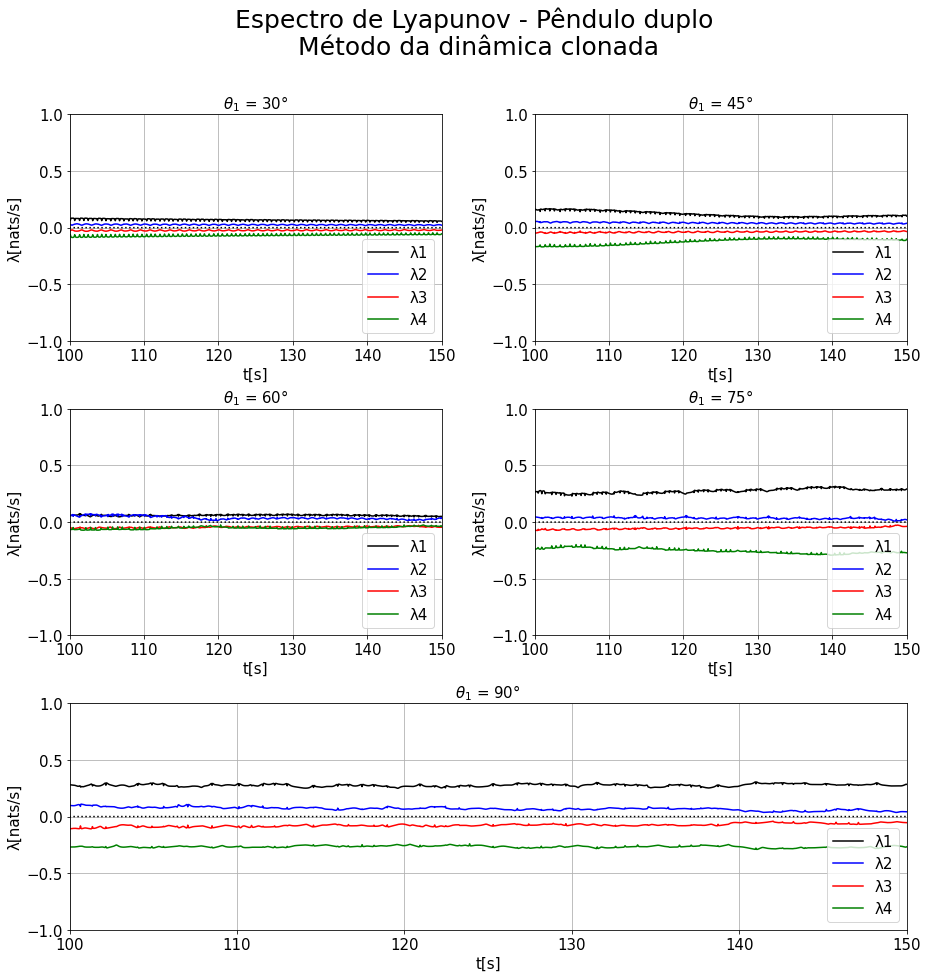

In [118]:
fig = plt.figure(figsize=(15, 15))

rows = 3
columns = 2

ylim1, ylim2 = -1, 1 
xlim1, xlim2 = 100, 150


grid = plt.GridSpec(rows, columns, wspace = .25, hspace = .3)

plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=25)  # fontsize of the figure title

fig.suptitle('Espectro de Lyapunov - Pêndulo duplo\n Método da dinâmica clonada')

plt.subplot(grid[0, 0])
plt.plot(li_t_pend[0],li_exp_pend[0][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[0],li_exp_pend[0][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[0],li_exp_pend[0][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[0],li_exp_pend[0][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[0],np.zeros(len(li_t_pend[0])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[0])

plt.subplot(grid[0, 1])
plt.plot(li_t_pend[1],li_exp_pend[1][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[1],li_exp_pend[1][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[1],li_exp_pend[1][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[1],li_exp_pend[1][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[1],np.zeros(len(li_t_pend[1])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[1])

plt.subplot(grid[1, 0])
plt.plot(li_t_pend[2],li_exp_pend[2][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[2],li_exp_pend[2][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[2],li_exp_pend[2][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[2],li_exp_pend[2][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[2],np.zeros(len(li_t_pend[2])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[2])

plt.subplot(grid[1, 1])
plt.plot(li_t_pend[3],li_exp_pend[3][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[3],li_exp_pend[3][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[3],li_exp_pend[3][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[3],li_exp_pend[3][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[3],np.zeros(len(li_t_pend[3])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[3])

plt.subplot(grid[2, :])
plt.plot(li_t_pend[4],li_exp_pend[4][0], label = 'λ1', c = 'k')
plt.plot(li_t_pend[4],li_exp_pend[4][1], label = 'λ2', c = 'b')
plt.plot(li_t_pend[4],li_exp_pend[4][2], label = 'λ3', c = 'r')
plt.plot(li_t_pend[4],li_exp_pend[4][3], label = 'λ4', c = 'g')
plt.plot(li_t_pend[4],np.zeros(len(li_t_pend[4])), c='k', ls = ':', lw = 1.5)
plt.grid()
plt.ylim(ylim1,ylim2)
plt.xlim(xlim1,xlim2)
plt.legend(loc='lower right')
plt.ylabel('λ[nats/s]')
plt.xlabel('t[s]')
plt.title(''r'$\theta_1$ = %.0f°' %thetas[4])

**Execução do Código:**

**Antigo**

In [112]:
def lr_model_old(s, k1 = 10, k2= 28, k3 = 8.0/3.0):
    
    """
    Modelo de Lorenz com Linearização 
    Declara as equações do Sistema de Lorenz
    Retorna um vetor com a derivada primeira de cada variável em relação ao tempo 
    Linearização feita a partir do JACOBIANO da função
    """
    
    #o tamanho do array de s representa o quantas variáveis estão na EDO
    x = s[0]
    y = s[1]
    z = s[2]
    
    #as variáveis do modelo linearizado (Perturbação):
    
    xp1= s[3]
    xp2= s[4]
    xp3= s[5]
    
    yp1= s[6]
    yp2= s[7]
    yp3= s[8]
    
    zp1= s[9]
    zp2= s[10]
    zp3= s[11]
    
    #constantes de referência do sistema
    #k1 = 10  - sigma 
    #k2 = 28 - rô
    #k3 = 8.0/3.0 - beta 
       
    ### Utilizar vetores para ficar apenas três expressões
    #Equações diferenciais do sistema
    dxdt = k1*(y - x)
    dydt = x*(k2-z)-y
    dzdt = x*y-k3*z
    
    #Equações Linearizadas
    dxp1= k1 * (yp1 - xp1)
    dxp2= k1 * (yp2 - xp2)
    dxp3= k1 * (yp3 - xp3)
    
    dyp1= (k2 - z)*xp1 - yp1 - x*zp1 
    dyp2= (k2 - z)*xp2 - yp2 - x*zp2 
    dyp3= (k2 - z)*xp3 - yp3 - x*zp3 
    
    dzp1= xp1*y + x*yp1 - k3*zp1
    dzp2= xp2*y + x*yp2 - k3*zp2
    dzp3= xp3*y + x*yp3 - k3*zp3

    #Queremos que retorne como um array para poder fazer as operações
    
    return np.array([dxdt,dydt,dzdt,
                    dxp1,dxp2,dxp3,
                    dyp1, dyp2,dyp3,
                    dzp1, dzp2, dzp3])

In [113]:
def Lyapunov_old(x, cum, n, t, t0, dt):
    
    ''' Método Wolf para calculo de Expoentes de Lyapunov. 
    Função realiza uma Normalização dos vetores, pelo metodo GramSchimidt.
    
    Funcionamento: 
    Este código recebe um vetor X, de tamanho nn = Nn*(n+1), composto por:
    
    1 - o Estado do sistema no momento x(T) (de dimensão n) >  
    No caso de Lorenz, será um vetor de 3 dimensões, que representa o estado do sistema fiduciário(ou de referencia) no instante t
    
    Ou seja: x(T)= {x0,x1,x2}
    
    2- Uma base de n vetores delta (Cada um de dimensão n). 
    Em Lorenz, teremos : delta1=  {x3,x4,x5}; delta2={x6,x7,x8} e delta3= {x9,x10,x11}
    
    Ou seja: X = {x(T) delta 1 delta 2 delta3}
    
    O código irá, então, ortogonalizar a base de deltas, formando uma base de vetores v: v1,v2,v3
    O módulo desses vetores sera armazenado em um somatório para que se calculo o exponente de lyapunov em cada uma das dimensões
    
    A base v então é normalizada (módulo =1) numa base u: u1, u2, u3 que será utilizada nas novas iterações ]
    (ver explicação sobre resultado do código)
    

    Parâmetros: 
    
    x: O parâmetro x é um estado do sistema, ou seja, terá dimensão nn 
    nn: (dimensão que considera o sistema e sua parte linearizada)
    nn= n*(n+1)
    
    cum: É uma variável auxiliar que armazena o somatório do módulo dos vetore. 
    Este somatório, quando divido pelo total de tempo percorrido (t+ dt - t0). 
    cum é um vetor de n elementos. Cada um desses elementos armazena o somatório de cada um dos autovetores do sistema. 
    Com isso, ao final pode-se calcular todos os n expoentes de Lyapunov. Ou seja, todo o espectro. 
    
    n: Dimensão do Espaço vetorial do sistema Estudado (para o sistema de Lorenz, n=3)
    
    t: Instante temporal referente ao estado x. Ou seja, estamos rodando cada iteração para o estado x(t). É um elemeto do vetor eixot
    
    t0: Instante Inicial 
    
    dt: delta de tempo percorrido a cada iteração
    
    
    Saída do código: 
    
    x: O código libera um novo vetor estado X, agora composto por: 
    X = {x(T) u1 u2 u3} , onde u1,u2,u3 são a base ortonormalizada de delta1,delta2,delta3
    
    cum: variável que armazena o somatório dos módulos dos vetores v, agora com o módulo da útlima iteração incluído
    lb: Os n expoentes de Lyapunov (considera todas as iterações até a corrente, e não apenas a corrente iteração) 
    
    '''
    
    ### Define info variáveis:  
    znorm = np.zeros(n)
    lb = np.zeros(n)
    
    m = n-1
    znorm[0]=0.0
    #<=m é a mesma coisa que range até n
    
    #normalizando o primeiro vetor
    for j in range (0,n):
        
        znorm[0] = znorm[0] + (x[n+(j*m+j)])**2 #permite percorrer o x de 3 em 3 (primeiro a primeira linearização, com x3, x6 e x9; depois em x4, x7 e x10, e aí em diante)
        
    znorm[0] = znorm[0] ** (1/2)
    
    for j in range(0,n):
        x[n+(m*j+j)] = x[n+(m*j+j)]/znorm[0]
    
    
    ##### Gerar novo conjunto de vetores ortonormais: 
    for j in range(1,n):
        #gsc = np.zeros(j-1)
        gsc = np.zeros(j)
        
        #Gerar j-1 (ou n-2) coeficientes GSR   
        for k in range(0,j):
            gsc[k] = 0.0
            
            for l in range(0,n):
                gsc[k] = gsc[k] + x[n+(m*l+(j+l))]*x[n+(m*l +(k+l))]
                
    
        #Construir um novo vetor:
        for k in range(0,n):
            
            for l in range(0,j):
                x[n+(m*k+(j+k))] = x[n+(m*k+(j+k))] - gsc[l]*x[n+(m*k+(l+k))]
                
        #Calculando a norma do vetor: 
        znorm[j] = 0.0
        
        for k in range(0,n):
            znorm[j] = znorm[j] + x[n+(m*k+(j+k))] ** 2 
        
        znorm[j] = znorm[j] ** (1/2)
        
        #Normaliza o novo vetor: 
        for k in range(0,n):
            x[n+(m*k+(j+k))] =  x[n+(m*k+(j+k))]/znorm[j]
    
    ###ATENÇÃO: COLOCAR A MULTIPLICAÇÃO POR UM FATOR DE DINÂMICA CLONADA. A SAÍDA DOS DOIS METODOS NÃO É A MESMA
    
    ## A saída do método Wolf atribui, ao vetor x de perturbação, o autovetor normalizado u. 
    # Ou seja, ao final de cada iteração, teremos que a perturbação inicial (cuja primeira era, simplesmente, a matriz diagonal)
    # se tornará a base de autovetores ortonormalizada. 
    # Traduzindo: a hiperesfera de perturbação, que no inicio é definida na base canonica, passa a ser definida na base 
    # dos autovetores ortonormalizados para as próximas iteraçõe. 
    
    #COntudo, o método da dinamica clonada funciona diferente. Nele, não estamos estudando a perturbação, a tangente do sistema. 
    # Estamos analisando, de fato, uma cópia do sistema. Ou seja, x[11] do Wolf é uma perturbaão (xp3, que é essencialmente diferente de x3), enquanto que, 
    # na dinamica clonada, x[11] é o x3 daquele clone: x[11] = xreferencia + xp3.
    #
    #Essa é a primeira diferença, ligaada ao que essencialmente se analisa em cada modelo. 
    
    # 
    ###ERRADO:
    #Outra mudança, um pouco mais sutil, é que, no wolf, corrigimos as perturbações para a base ortonormal e voltamos a simular
    # Na dinamica clonada, corrigimos o resultado na direção da diferença do clone frente à referencia: x0c1 = x(T) - xc1(T)
    # Seria o equivalente ao Z do método Wolf nas anotações do caderno.  
    # Nesse caso, a correção só coincide com a direção do autovetor normalizado no primeiro caso estudado 
    # (primeiro vetor que entra na normalização GS e não muda de direção)
    #
    #
    #
    
    
    #Armazena o módulo dos vetores, para permitir calcular o somatório e, consequentemente, o Expoente:
    for k in range(0,n):
        
        #Para método Wolf:
        cum[k] = cum[k] + np.log(znorm[k])/np.log(2.0)
        lb[k] = cum[k]/(t + dt - t0)
        
        #Para método de Dinamica clonada: 
        #cum[k] = cum[k] + np.log(znorm[k]/delta)/np.log(2.0)
        
        
        #print(znorm[k])
    return x, cum, lb

